In [46]:
import torch
from IPython.display import Image
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image as PImage

In [47]:
from tabulate import tabulate
def DisplayMatrix(M):
    print(tabulate(M,  tablefmt='double_grid'))

In [48]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

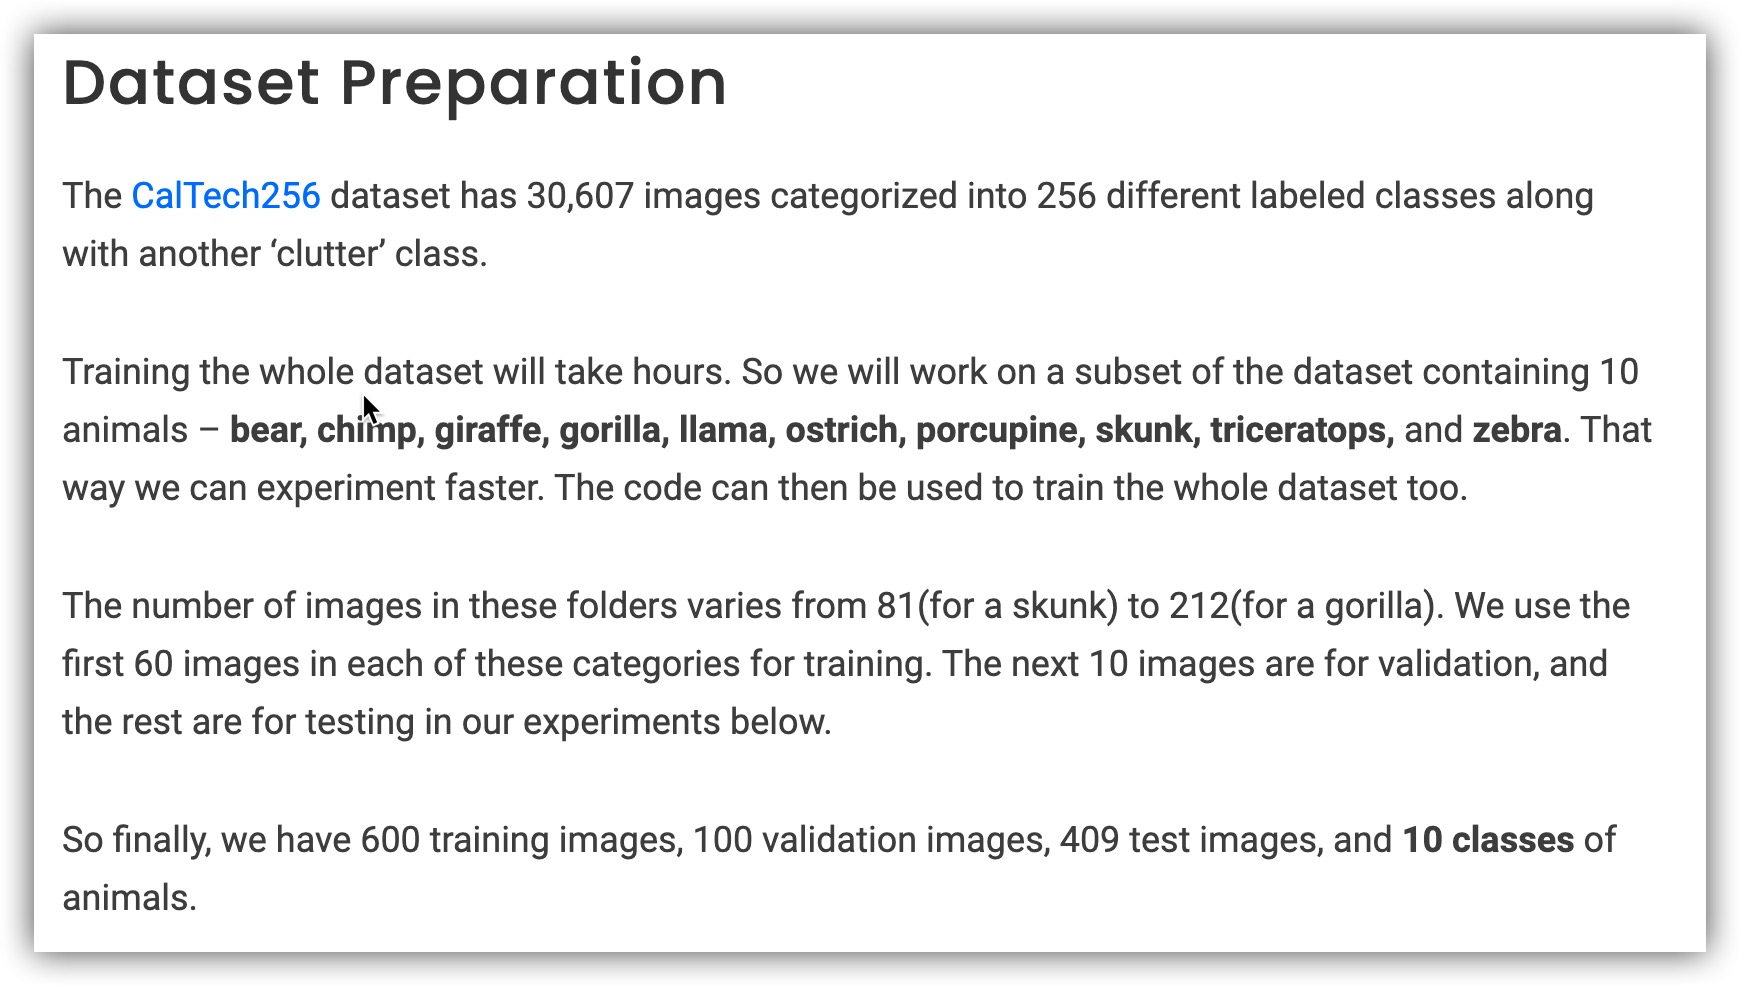

In [49]:
#http://www.vision.caltech.edu/datasets
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-03-52.jpg')

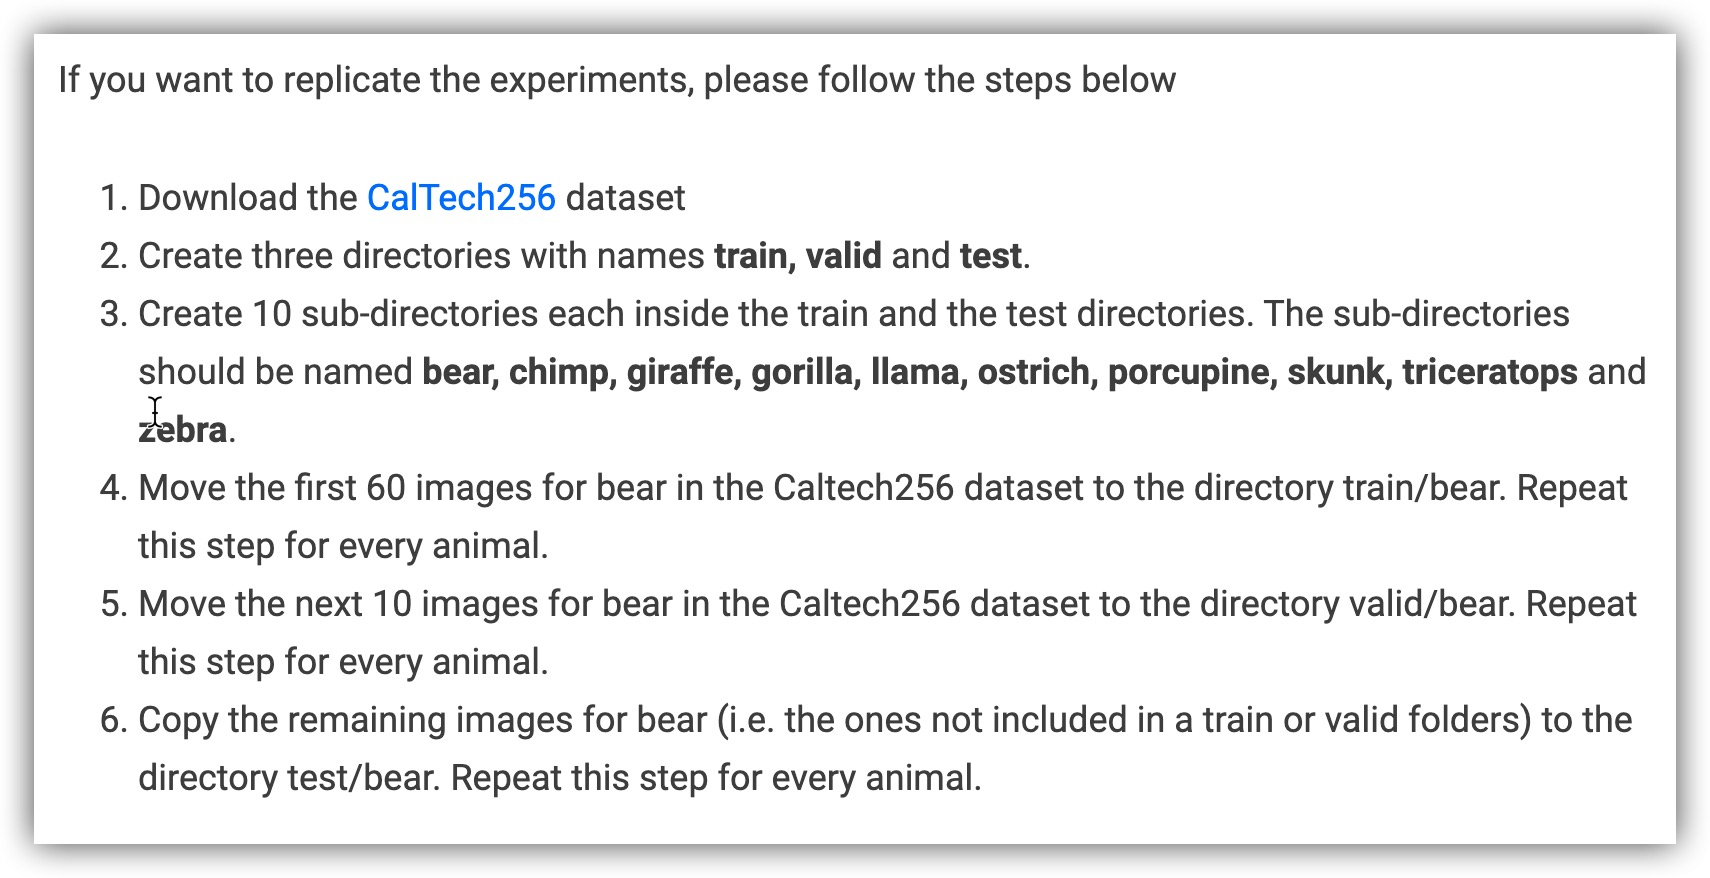

In [50]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-04-57.jpg')

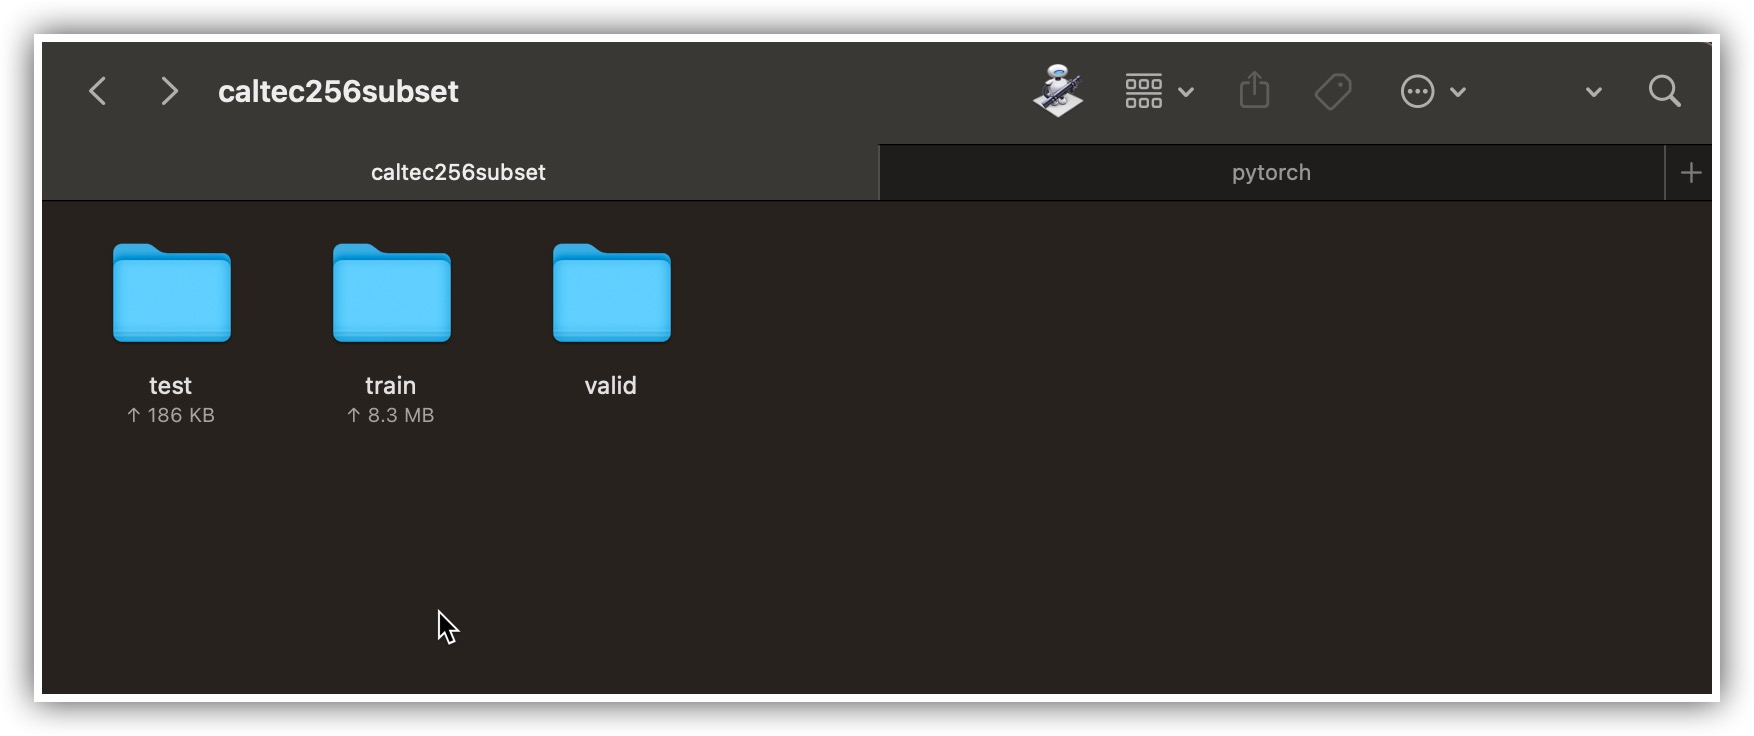

In [51]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-07-13.jpg')

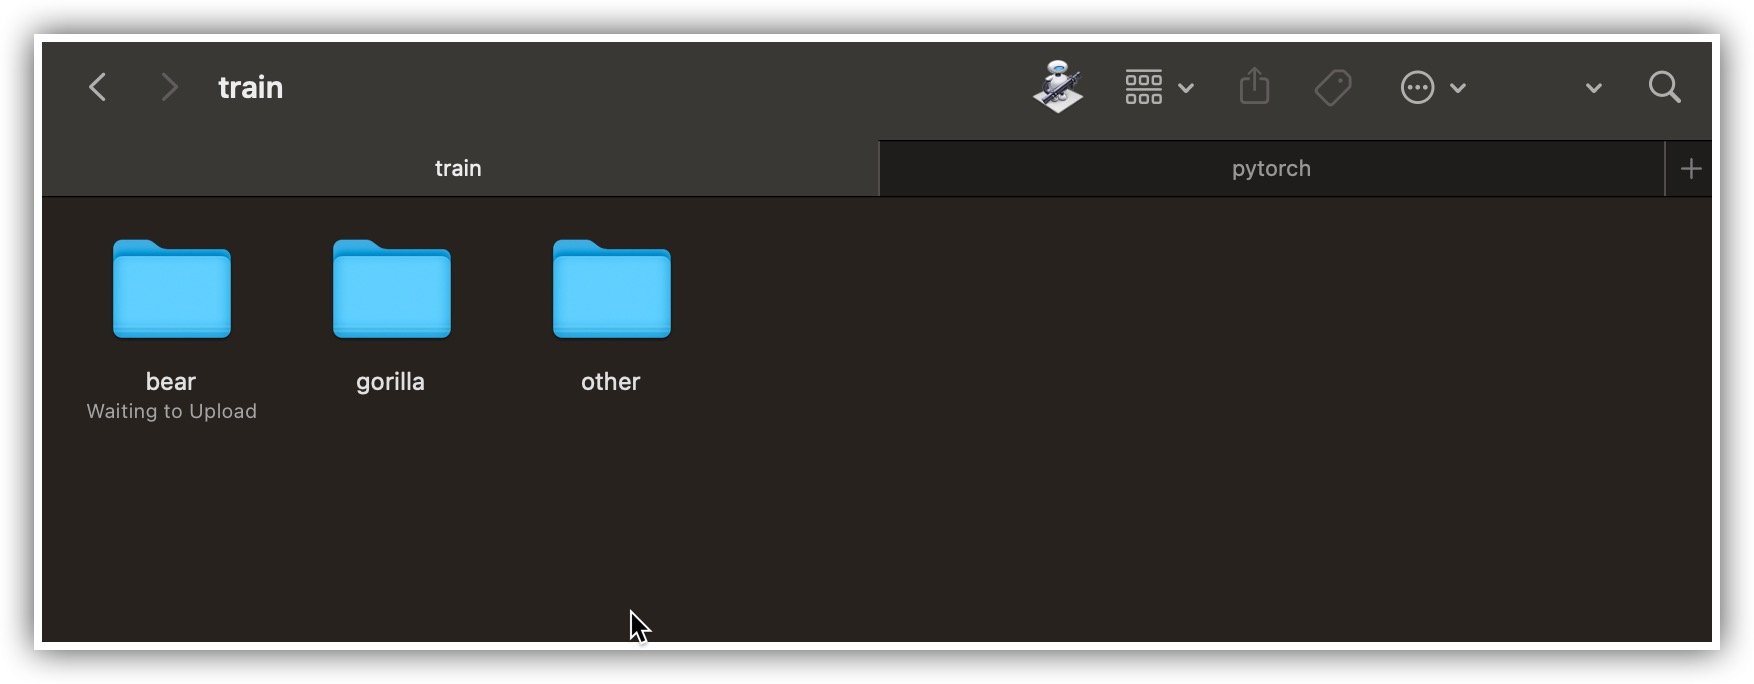

In [52]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-07-52.jpg')

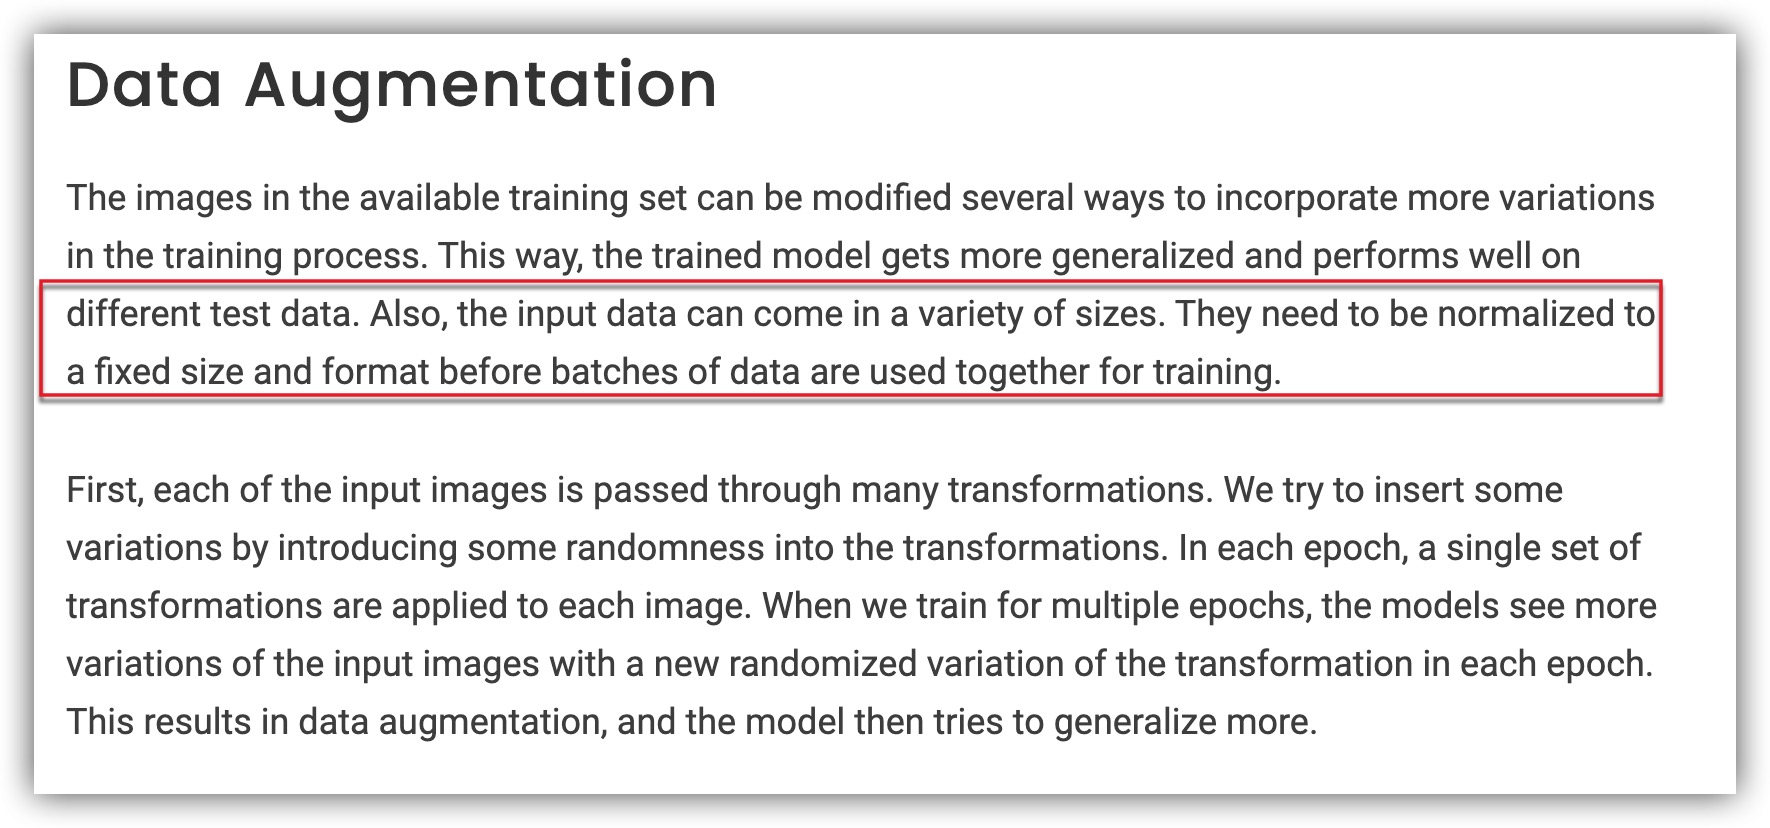

In [53]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-08-19.jpg')

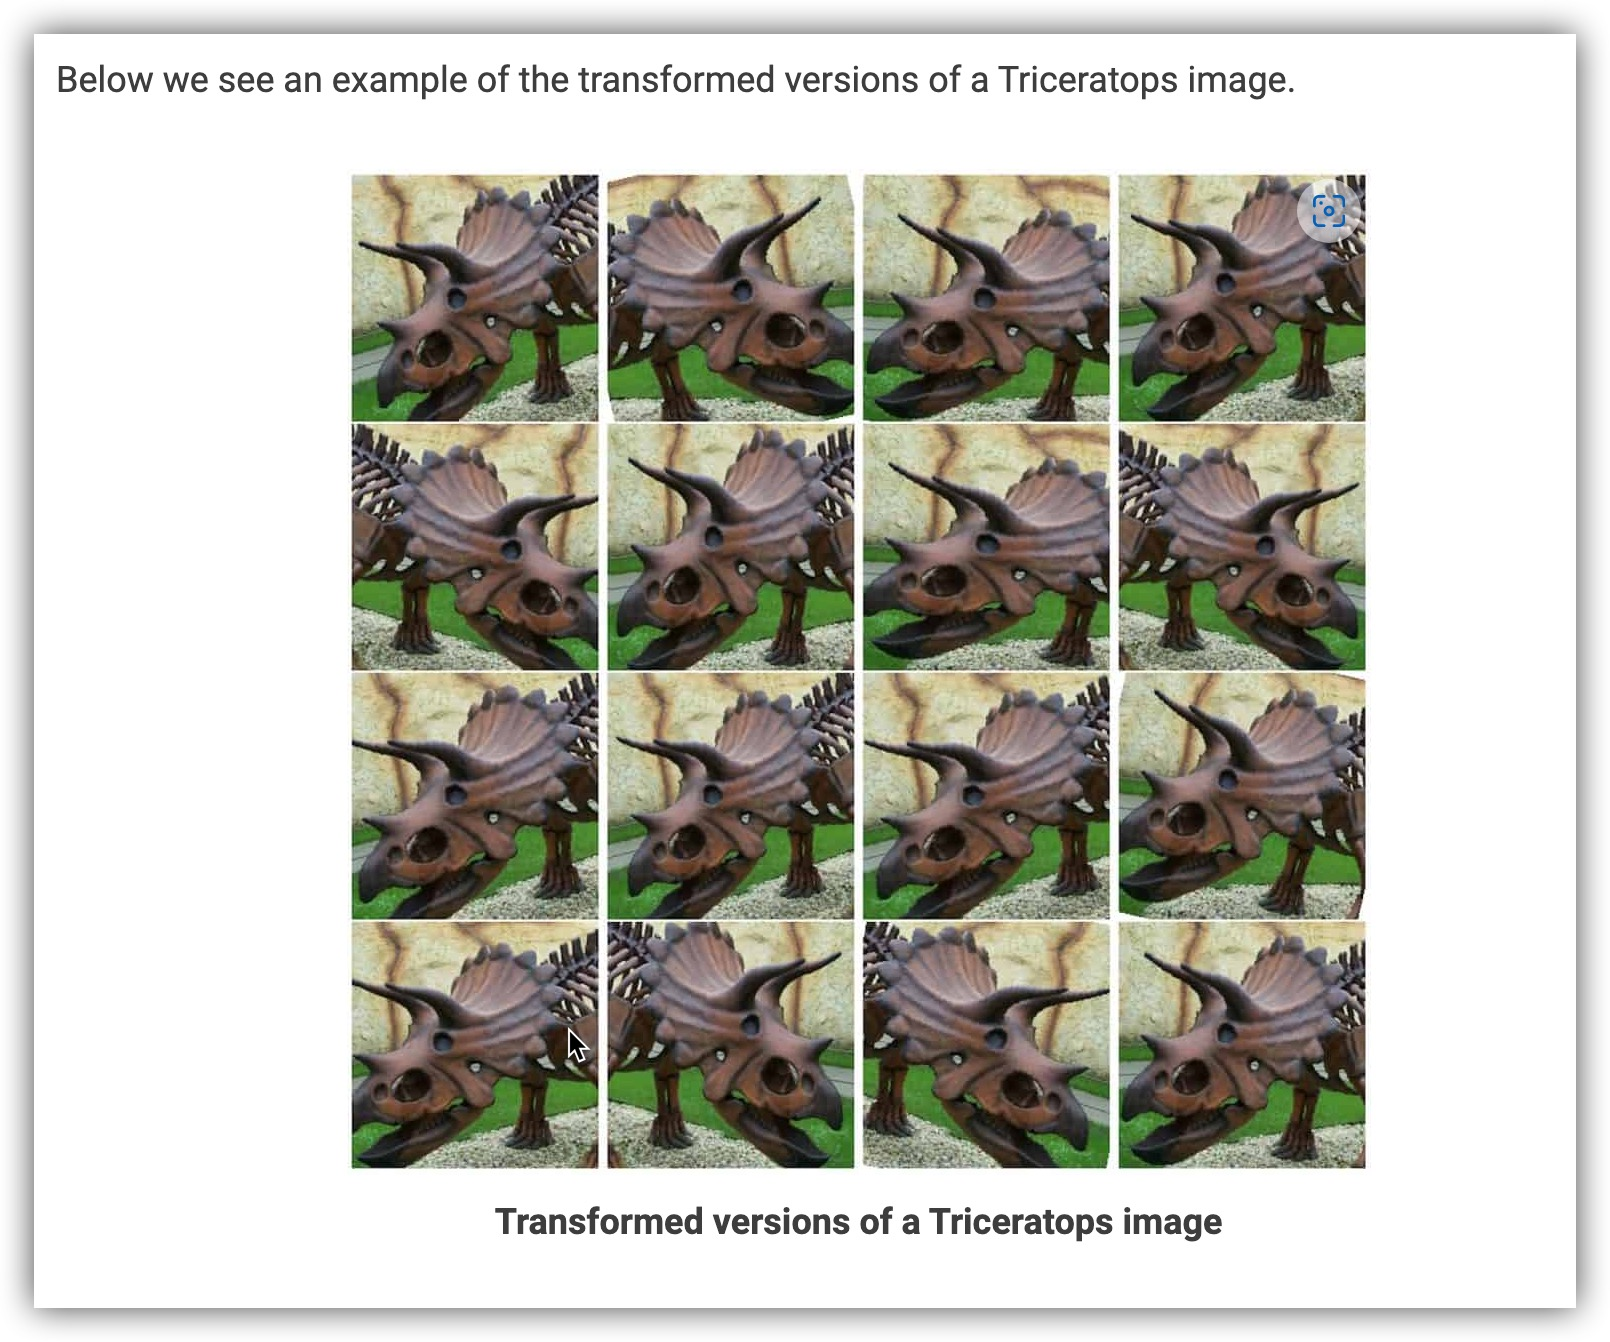

In [54]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-09-41.jpg')

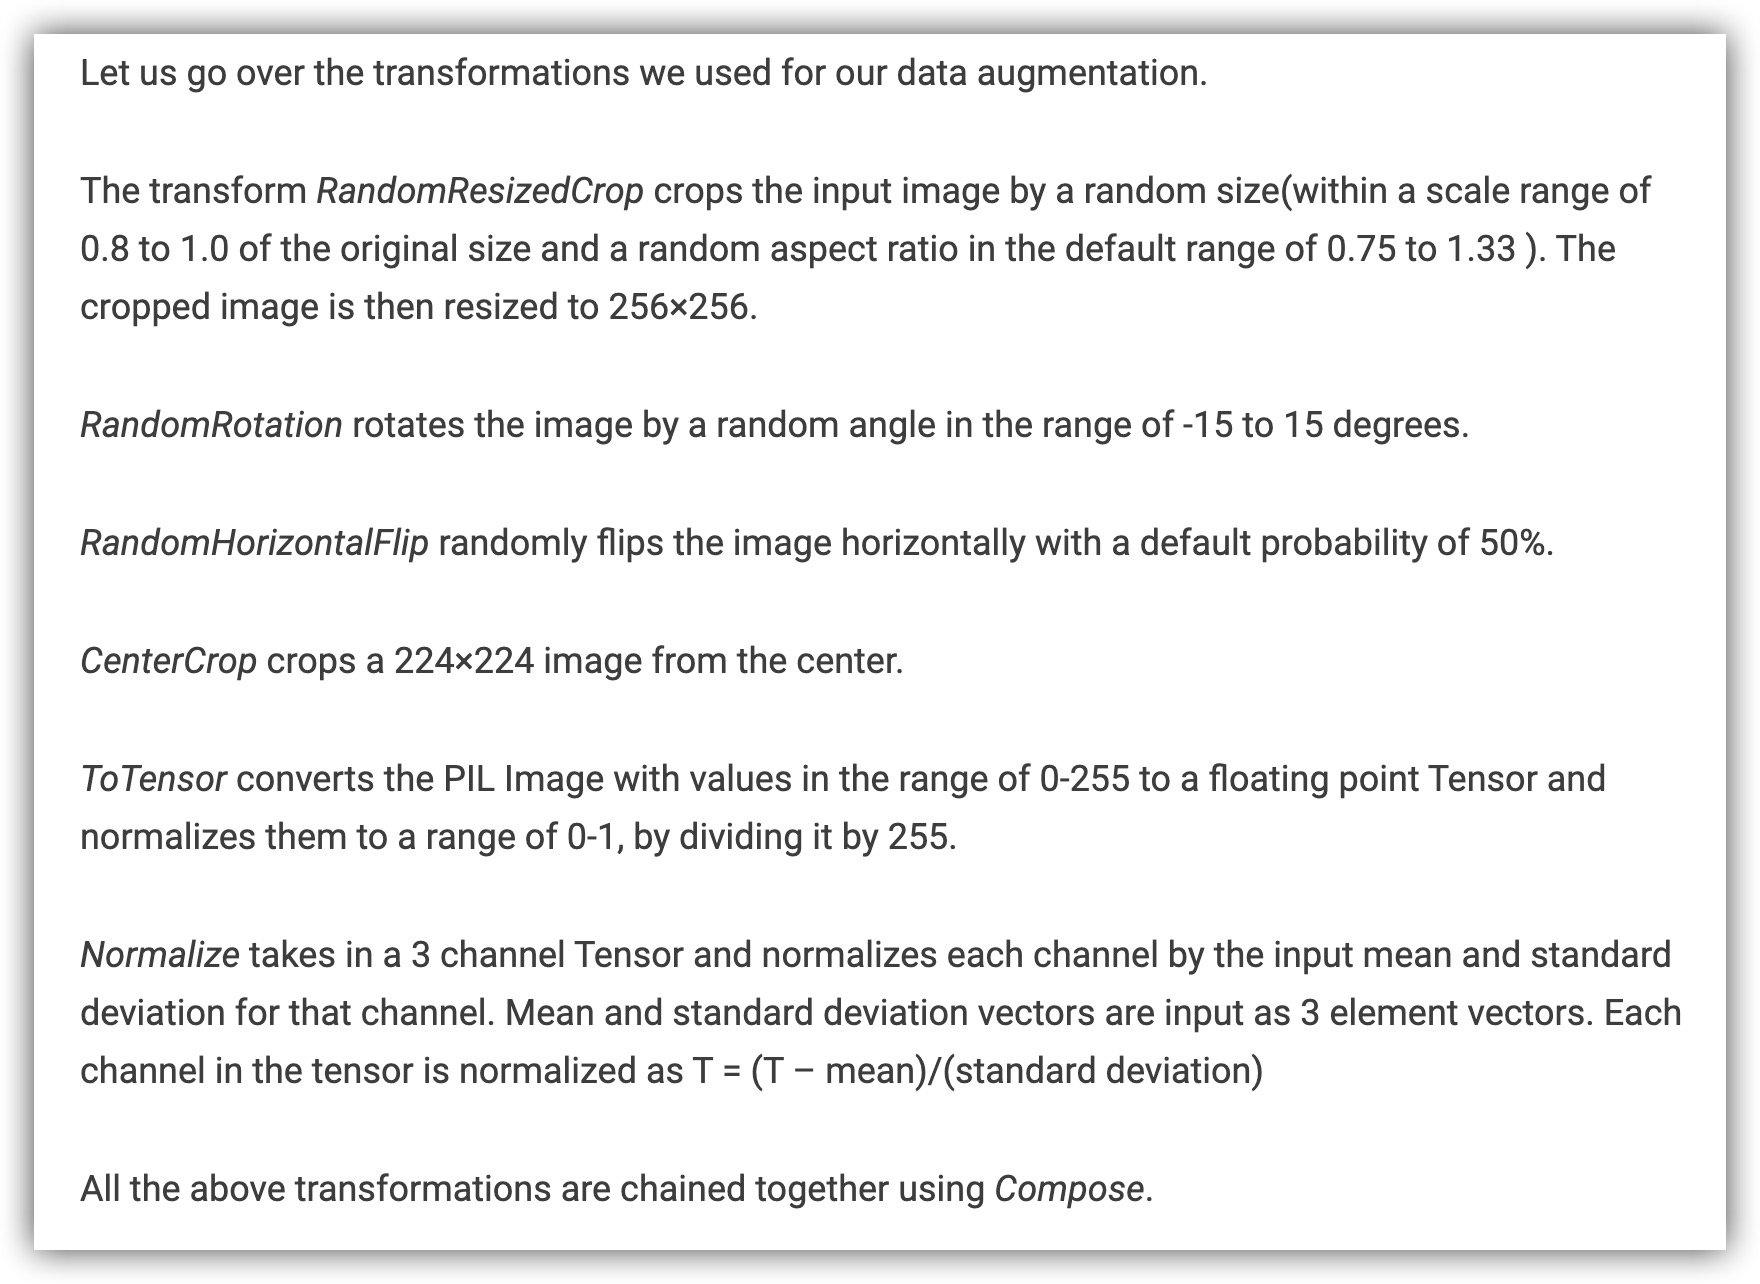

In [55]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-11-09.jpg')

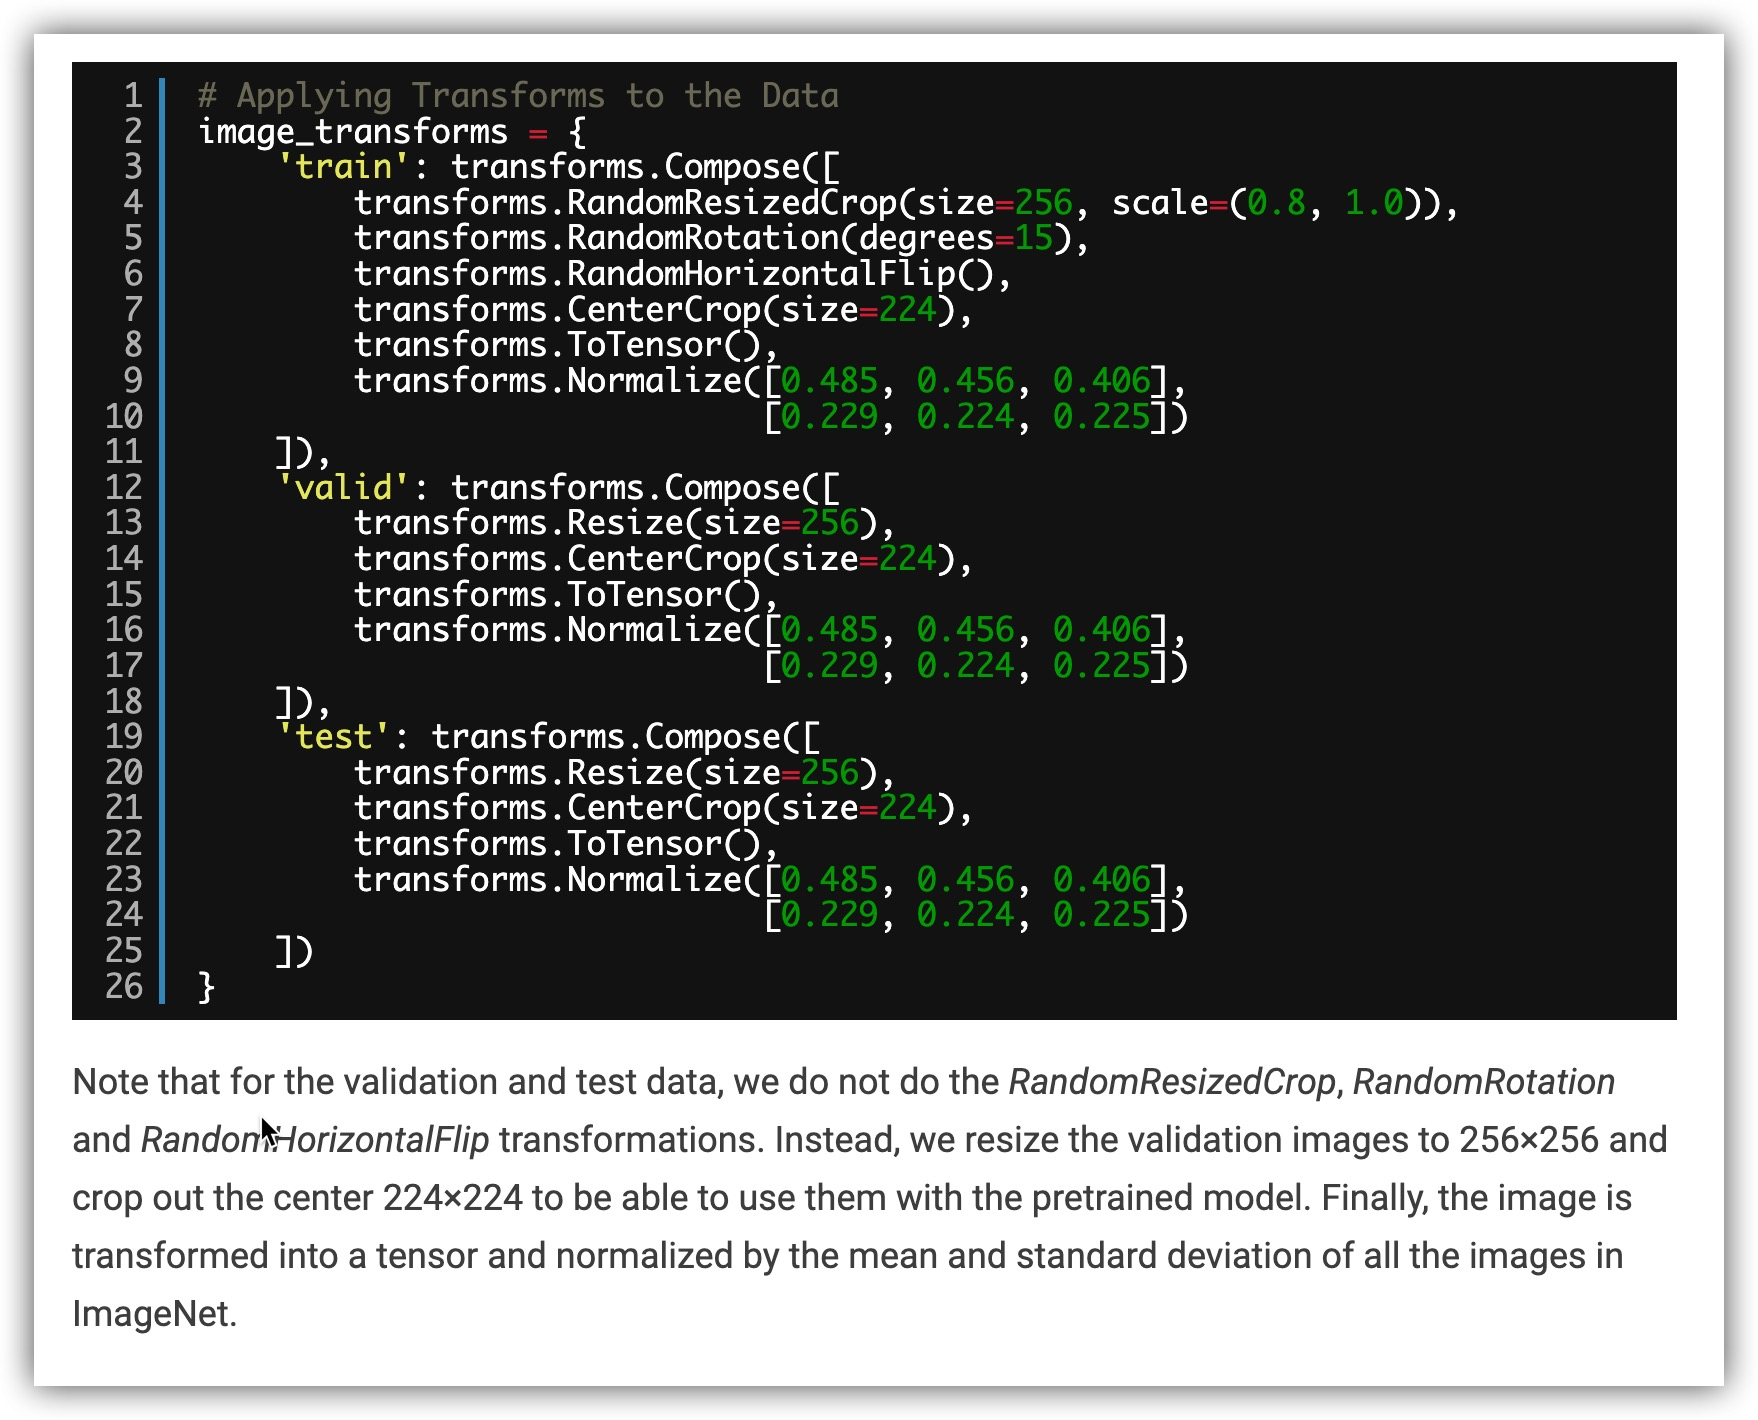

In [56]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-11-36.jpg')

In [57]:
from torchvision import transforms
image_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize(mean, std)]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])

}

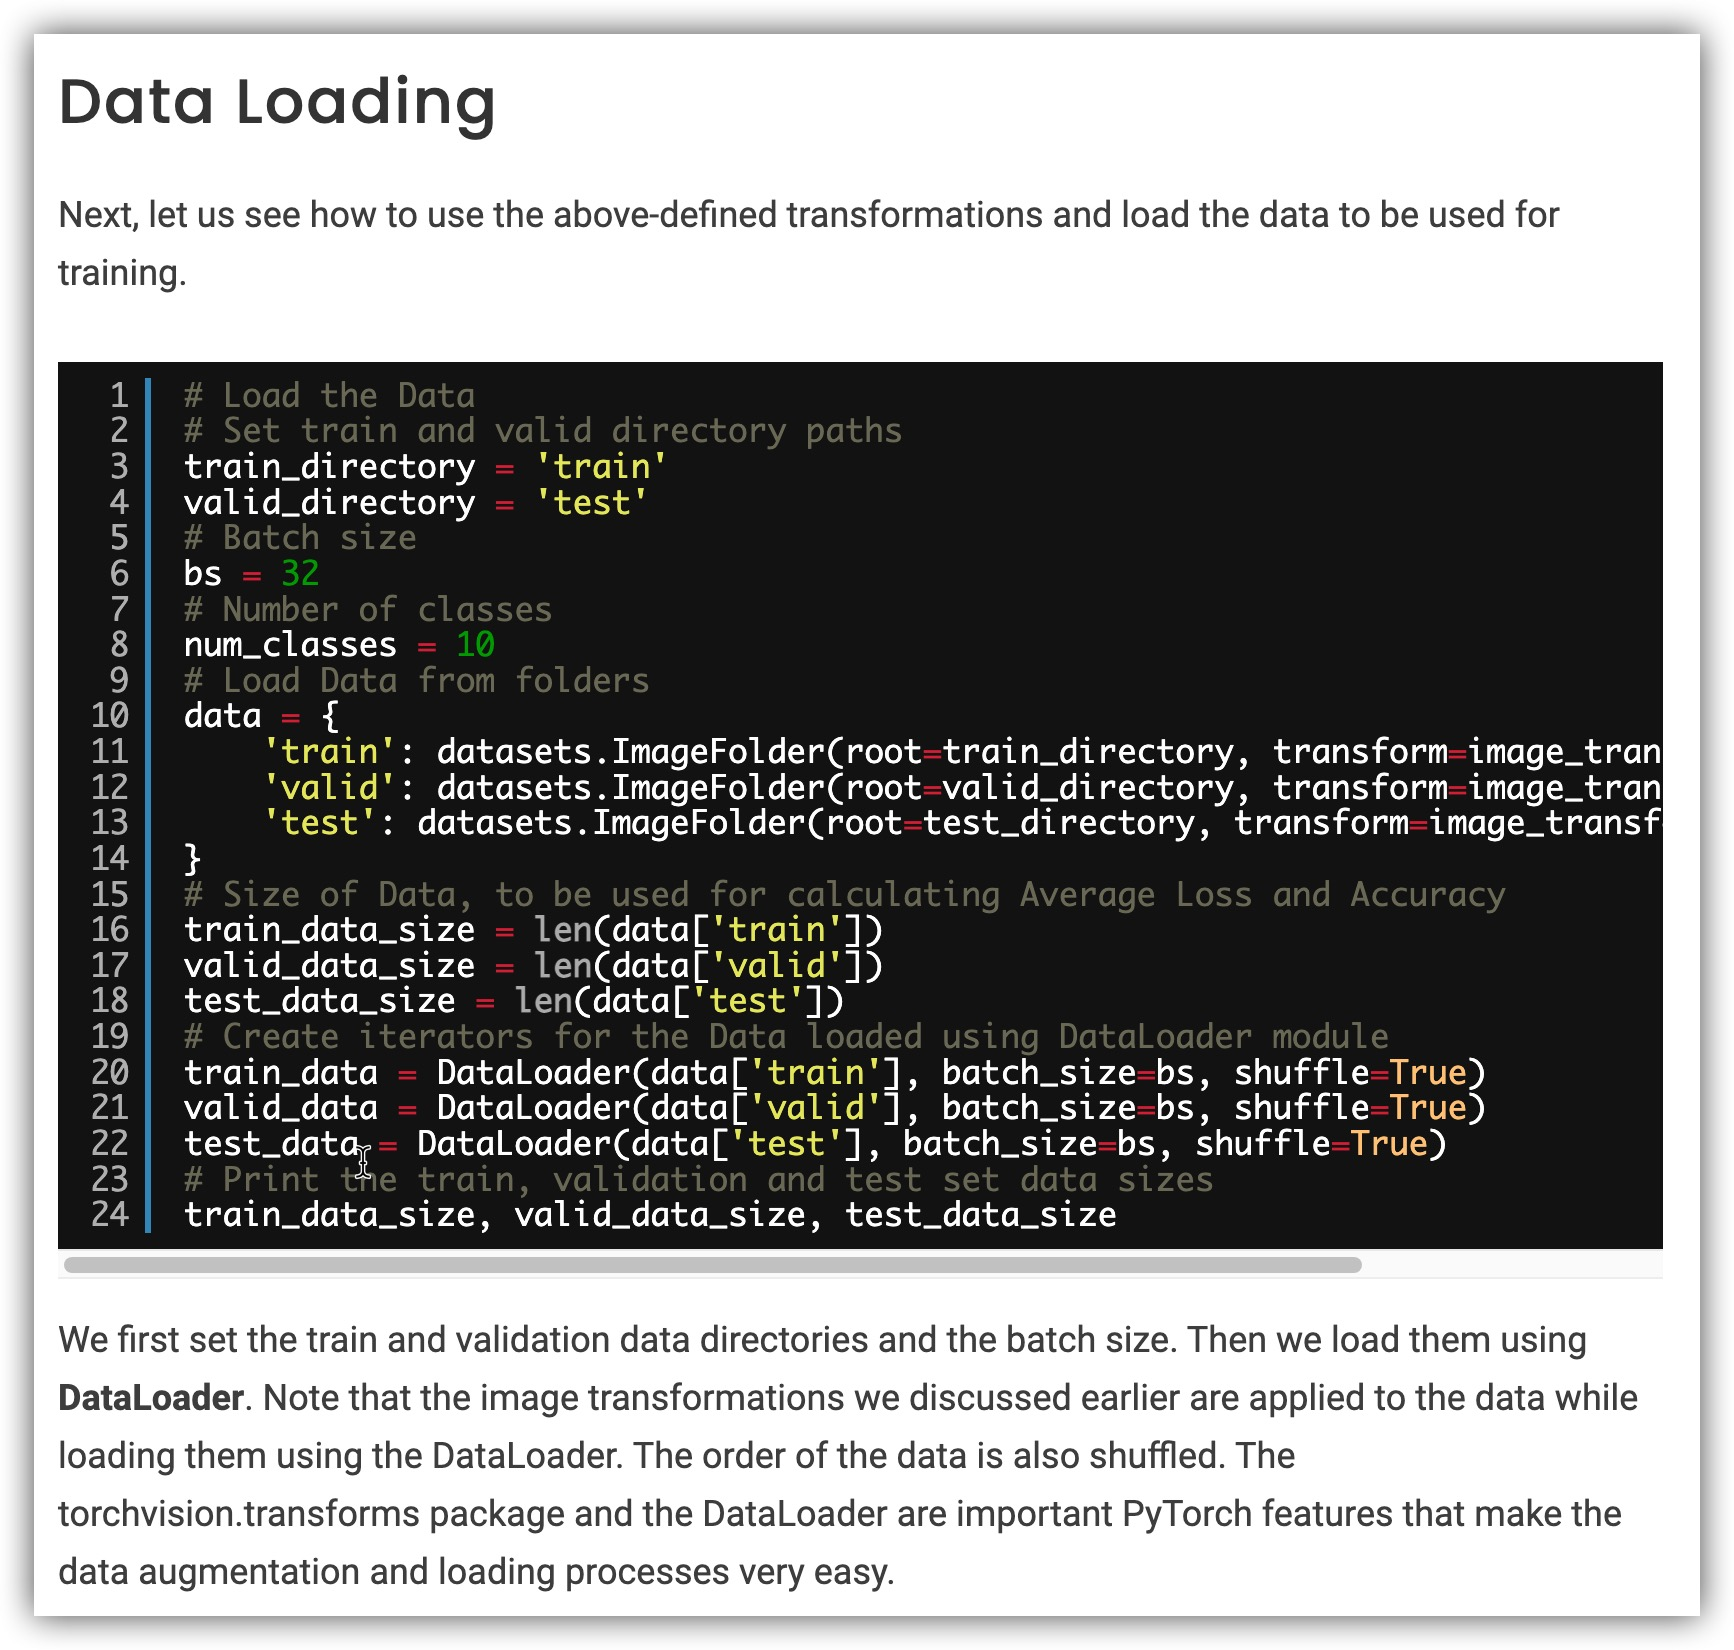

In [58]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-17-31.jpg')

In [59]:
# Load the Data

# Set train and valid directory paths
import os
dataset = 'Datasets/caltec256subset/'

train_directory = os.path.join(dataset, 'train')
valid_directory = os.path.join(dataset, 'valid')
test_directory = os.path.join(dataset, 'test')

# Batch size
bs = 32

# Number of classes
num_classes = len(os.listdir(valid_directory))  #10#2#257
print(num_classes)

# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid']),
    #'test': datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True)

4
{0: 'bear', 1: 'gorilla', 2: 'other'}


In [60]:
train_data_size, valid_data_size

(150, 60)

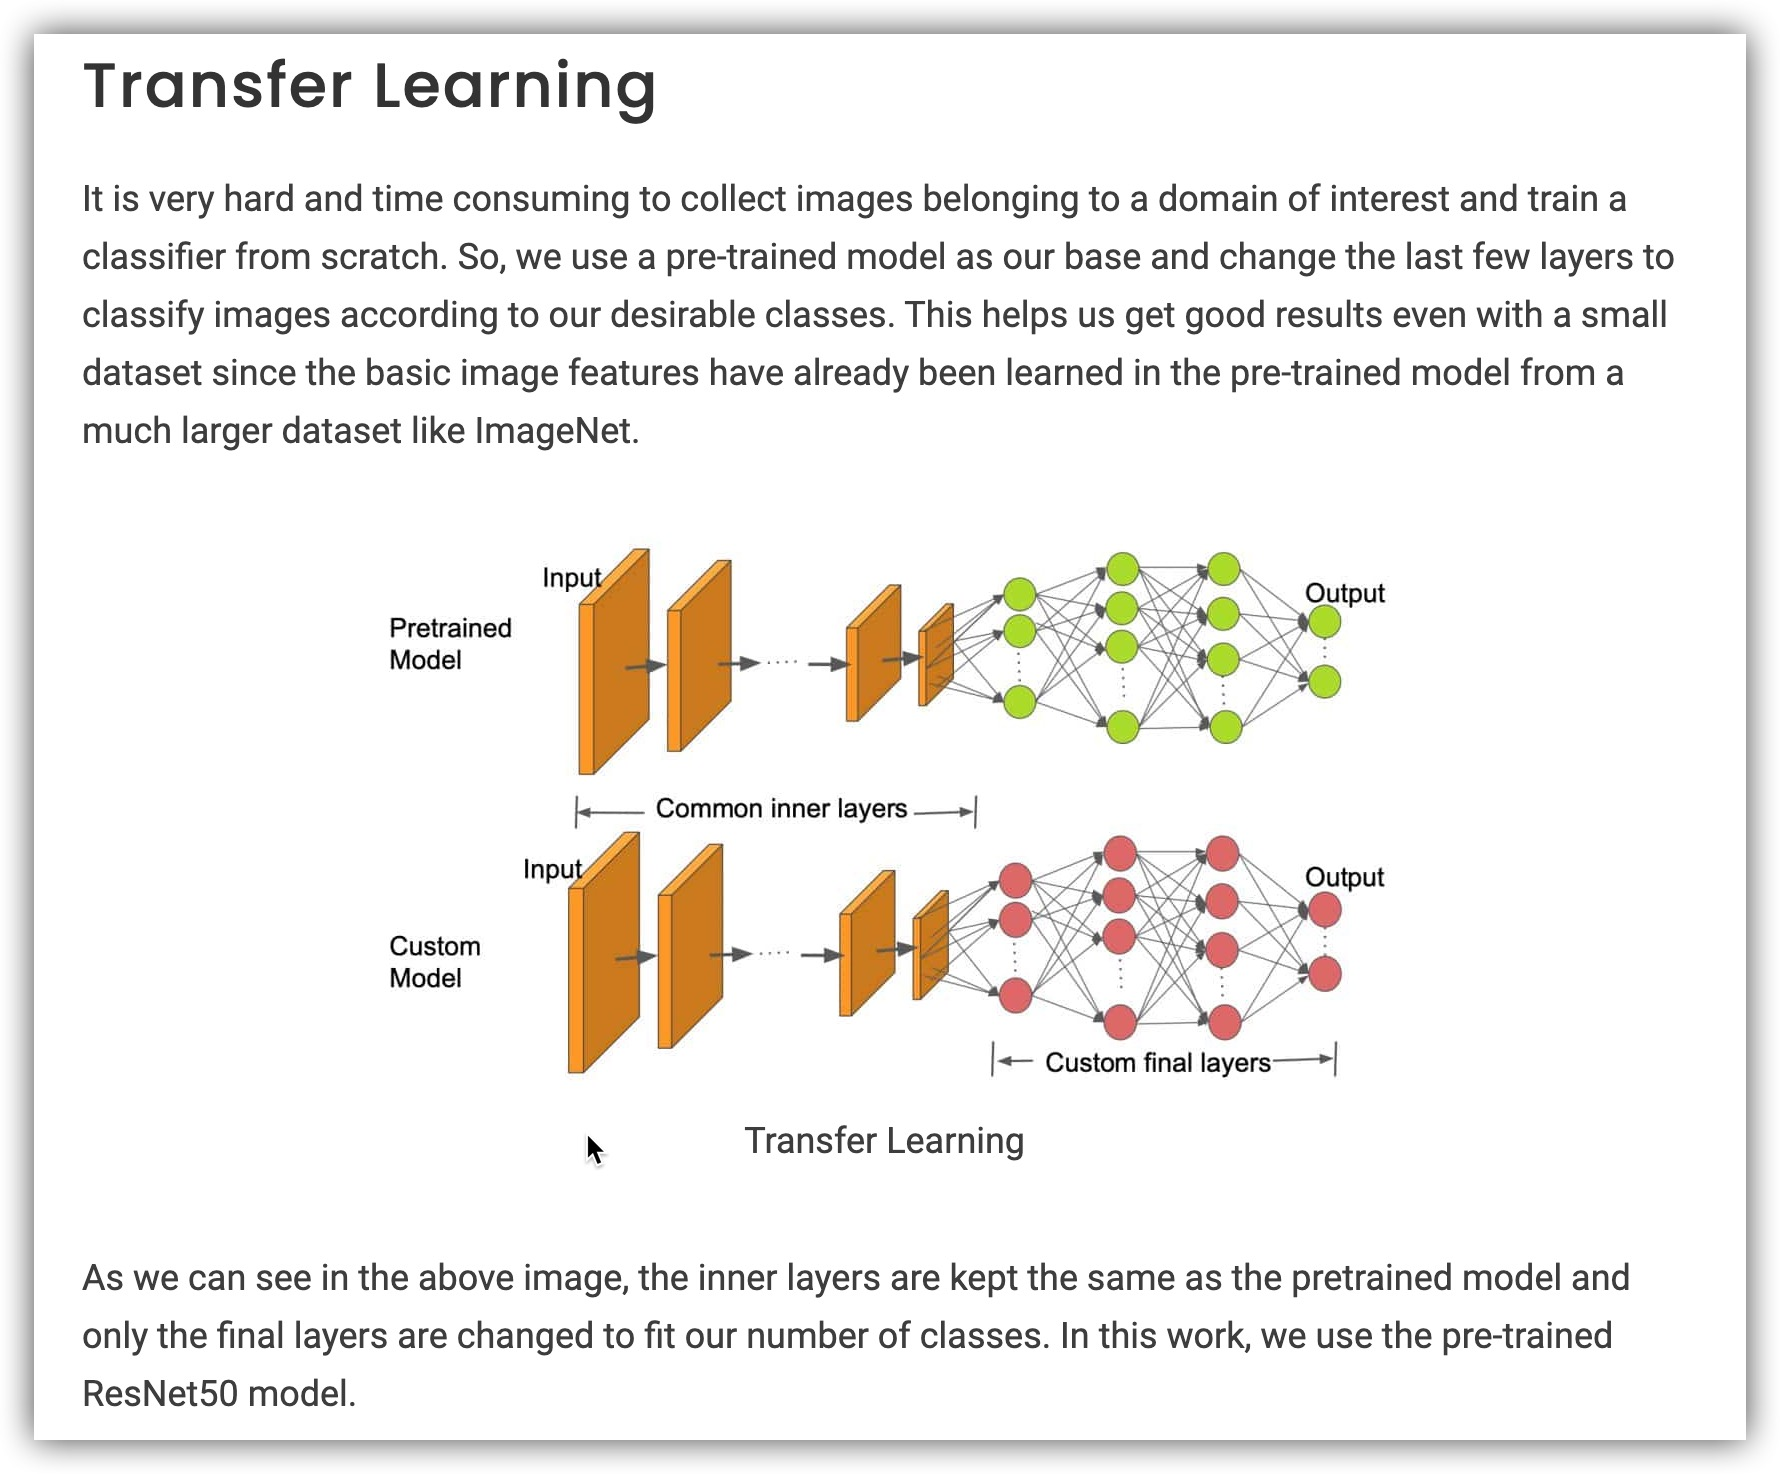

In [61]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-40-19.jpg')

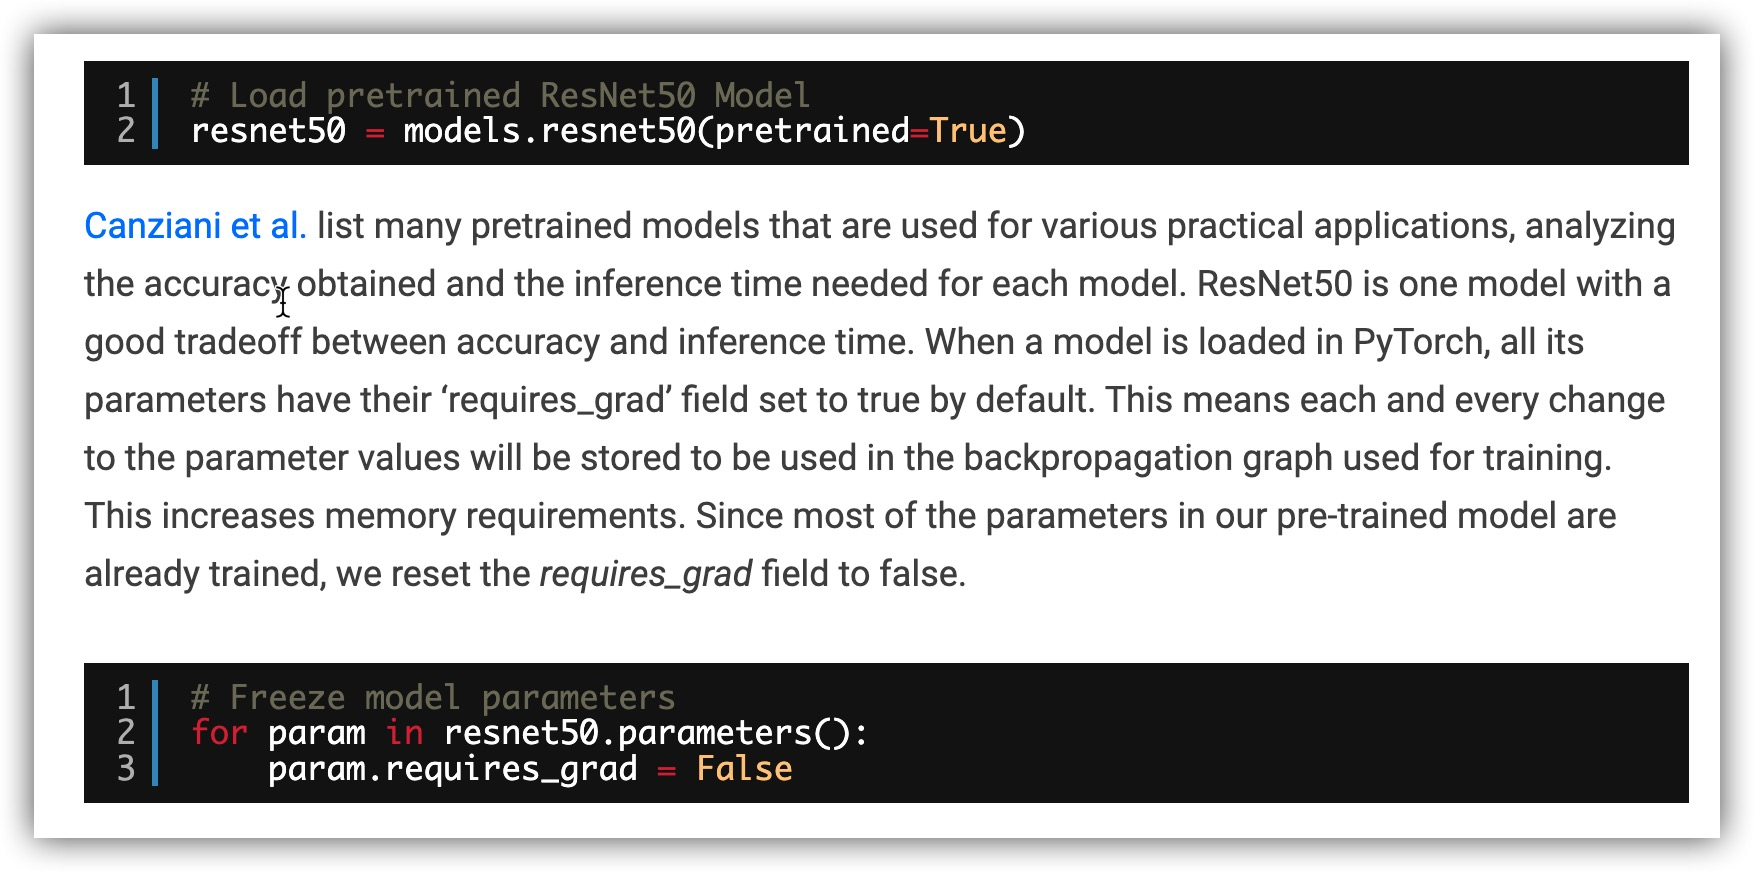

In [64]:
#https://arxiv.org/pdf/1605.07678.pdf
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-44-31.jpg')

In [63]:
# Load pretrained ResNet50 Model
resnet50= models.resnet50(pretrained=True)

/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/subhasish/opt/anaconda3/envs/ML/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/subhasish/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:15<00:00, 6.49MB/s]


In [65]:
for param in resnet50.parameters():
    param.requires_grad = False

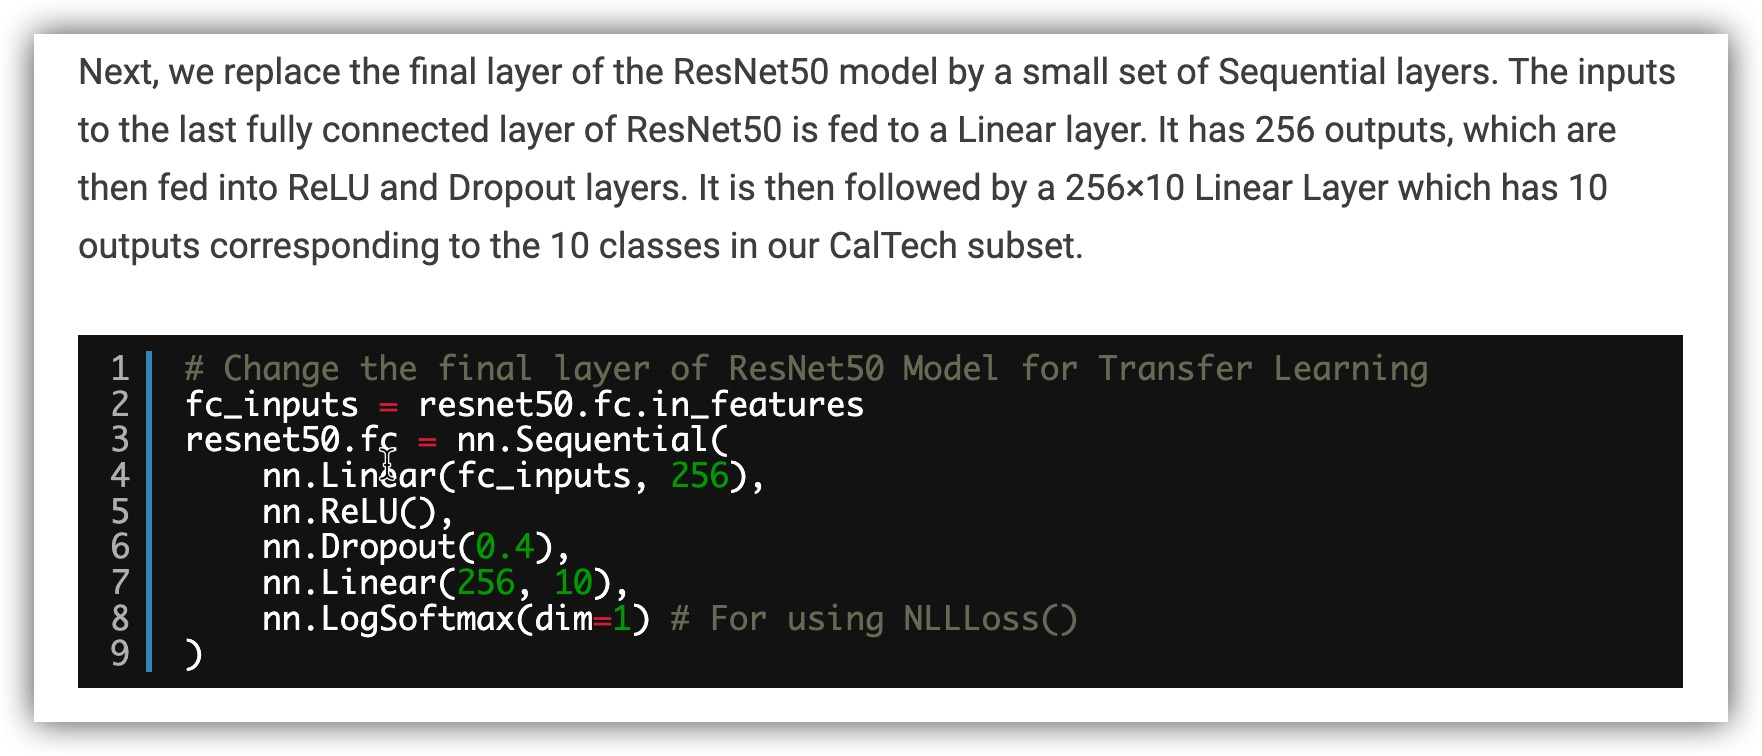

In [66]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-45-16.jpg')

In [67]:
fc_inputs = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, num_classes),  # 10 for CIFAR-10
    nn.LogSoftmax(dim=1)  # For using NLLLoss()
)

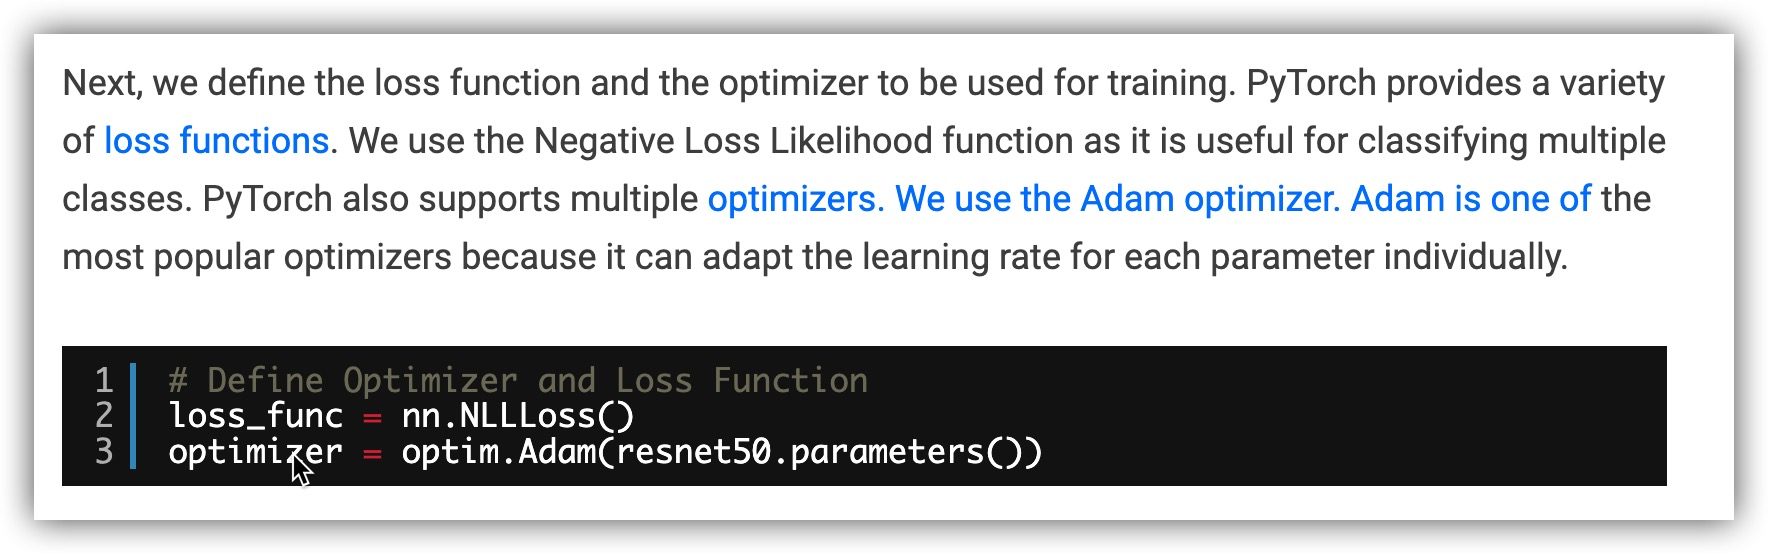

In [68]:
#https://pytorch.org/docs/stable/nn.html#loss-functions
#https://pytorch.org/docs/stable/optim.html#algorithms


Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-47-28.jpg')

In [69]:
loss_func = nn.NLLLoss()
optimizer= optim.Adam(resnet50.parameters(), lr=0.001)

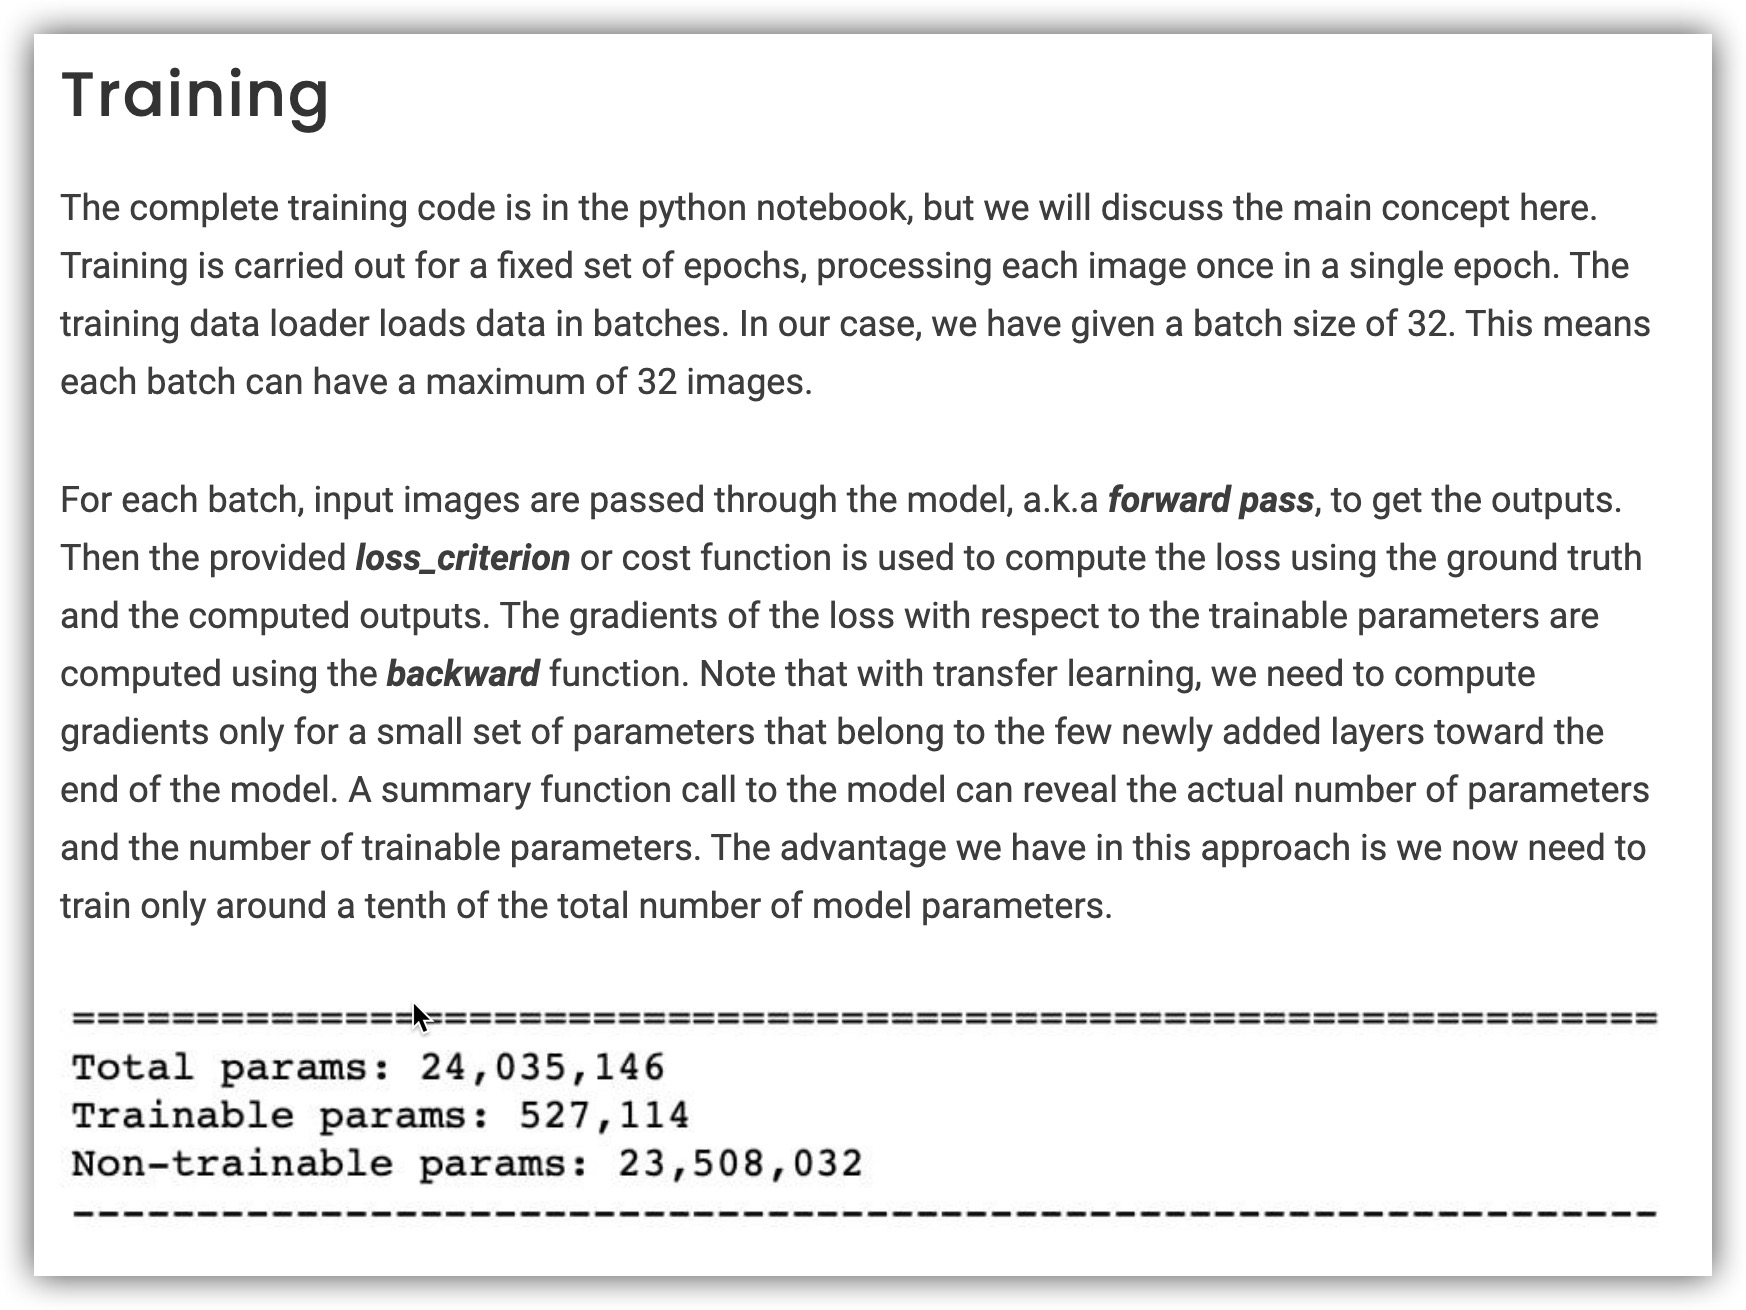

In [70]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-51-23.jpg')

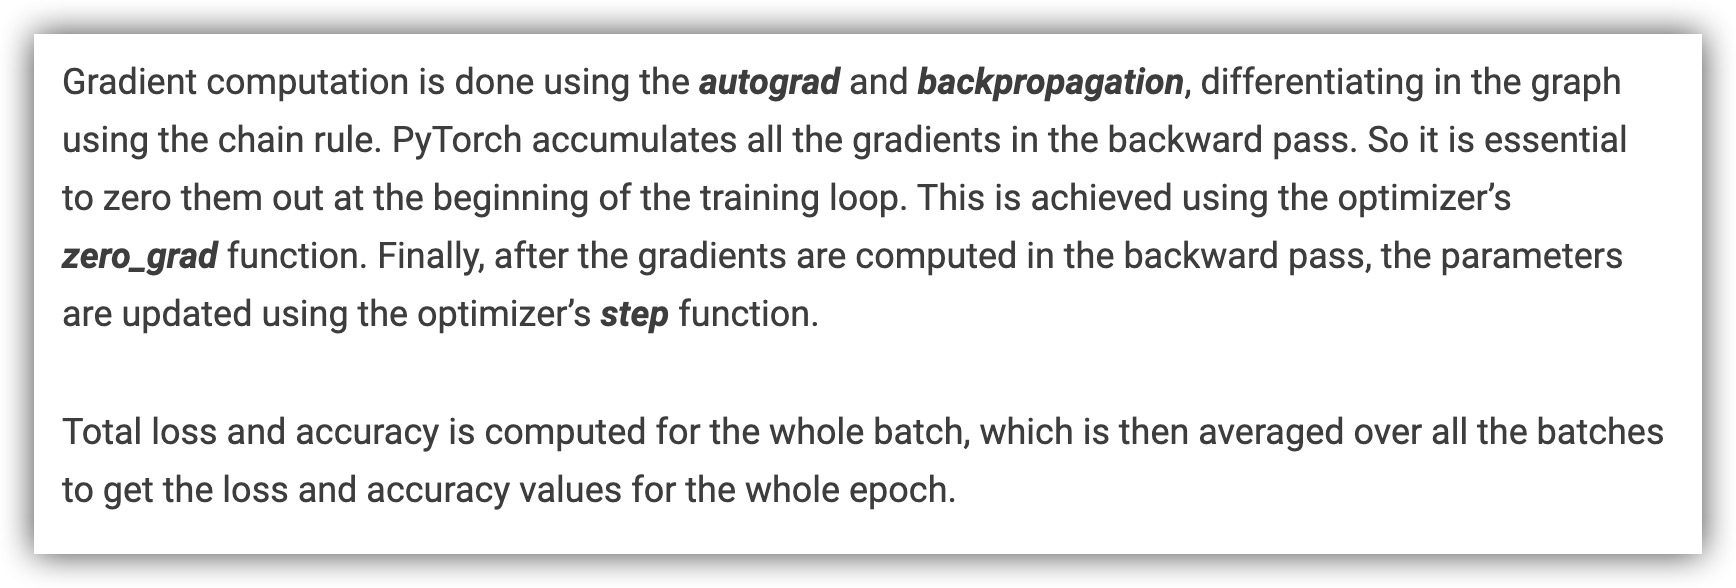

In [72]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-53-36.jpg')

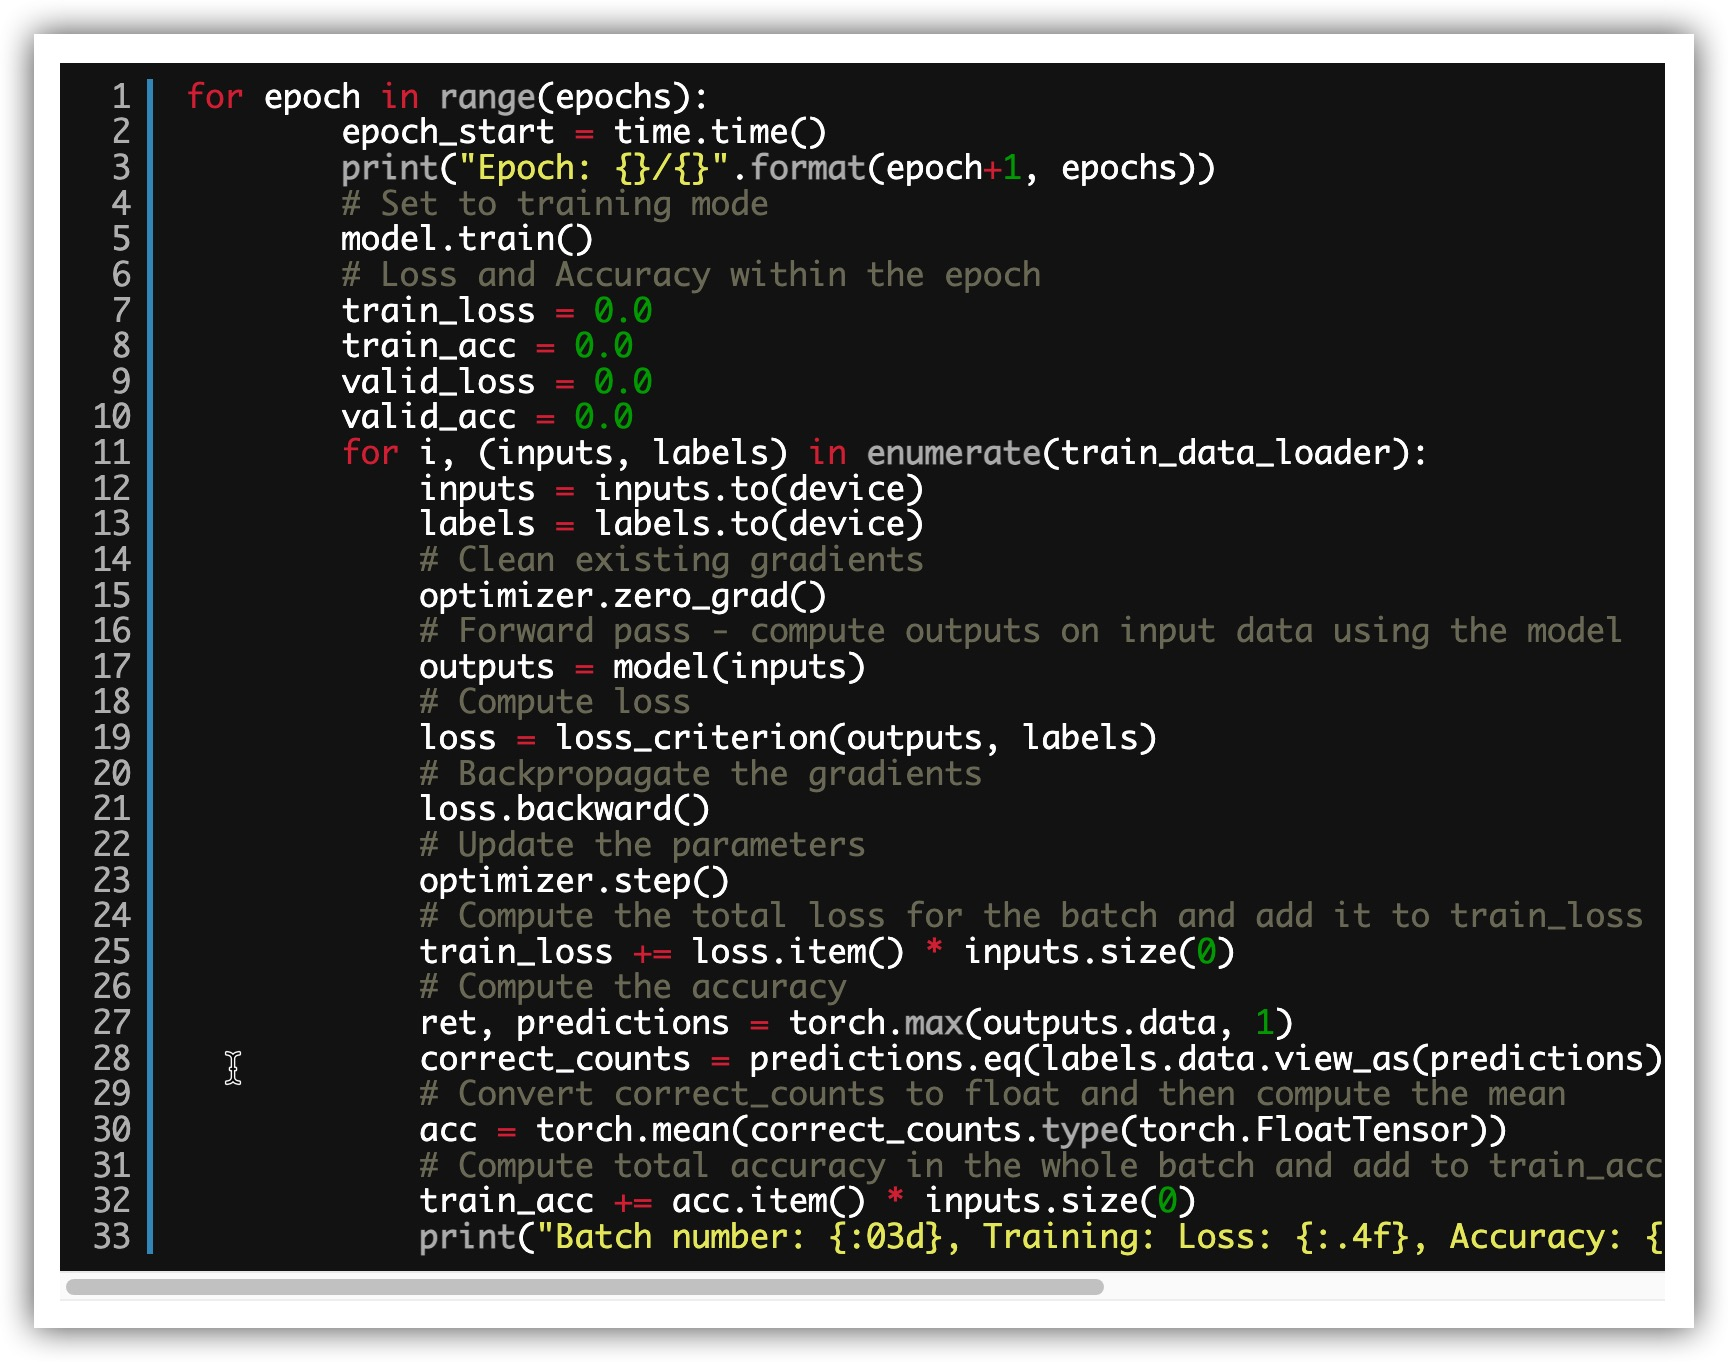

In [73]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_16-54-27.jpg')

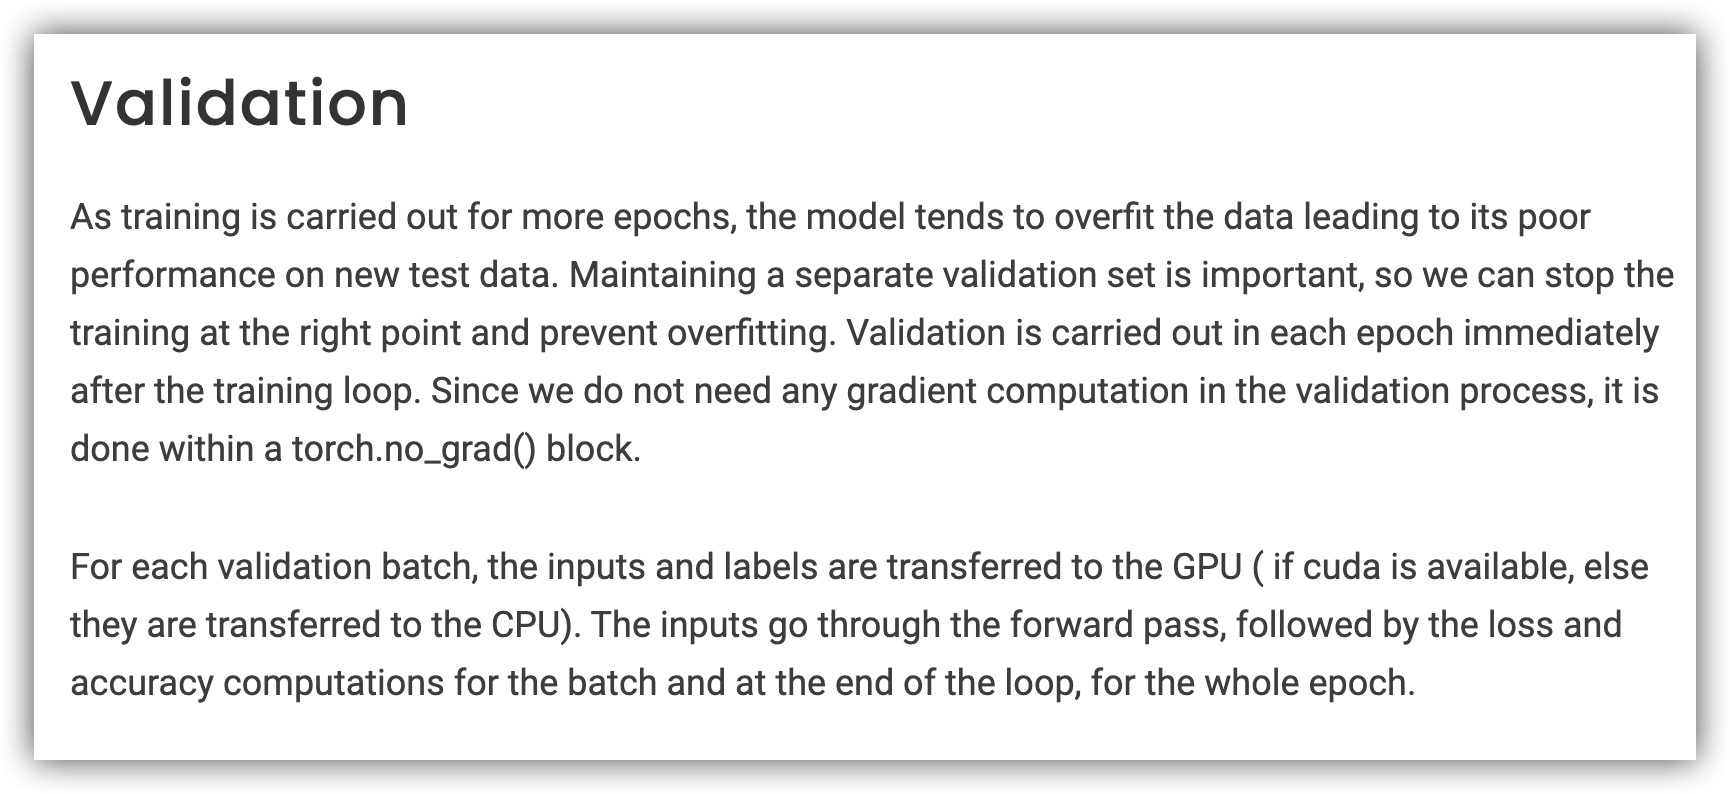

In [74]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_17-00-19.jpg')

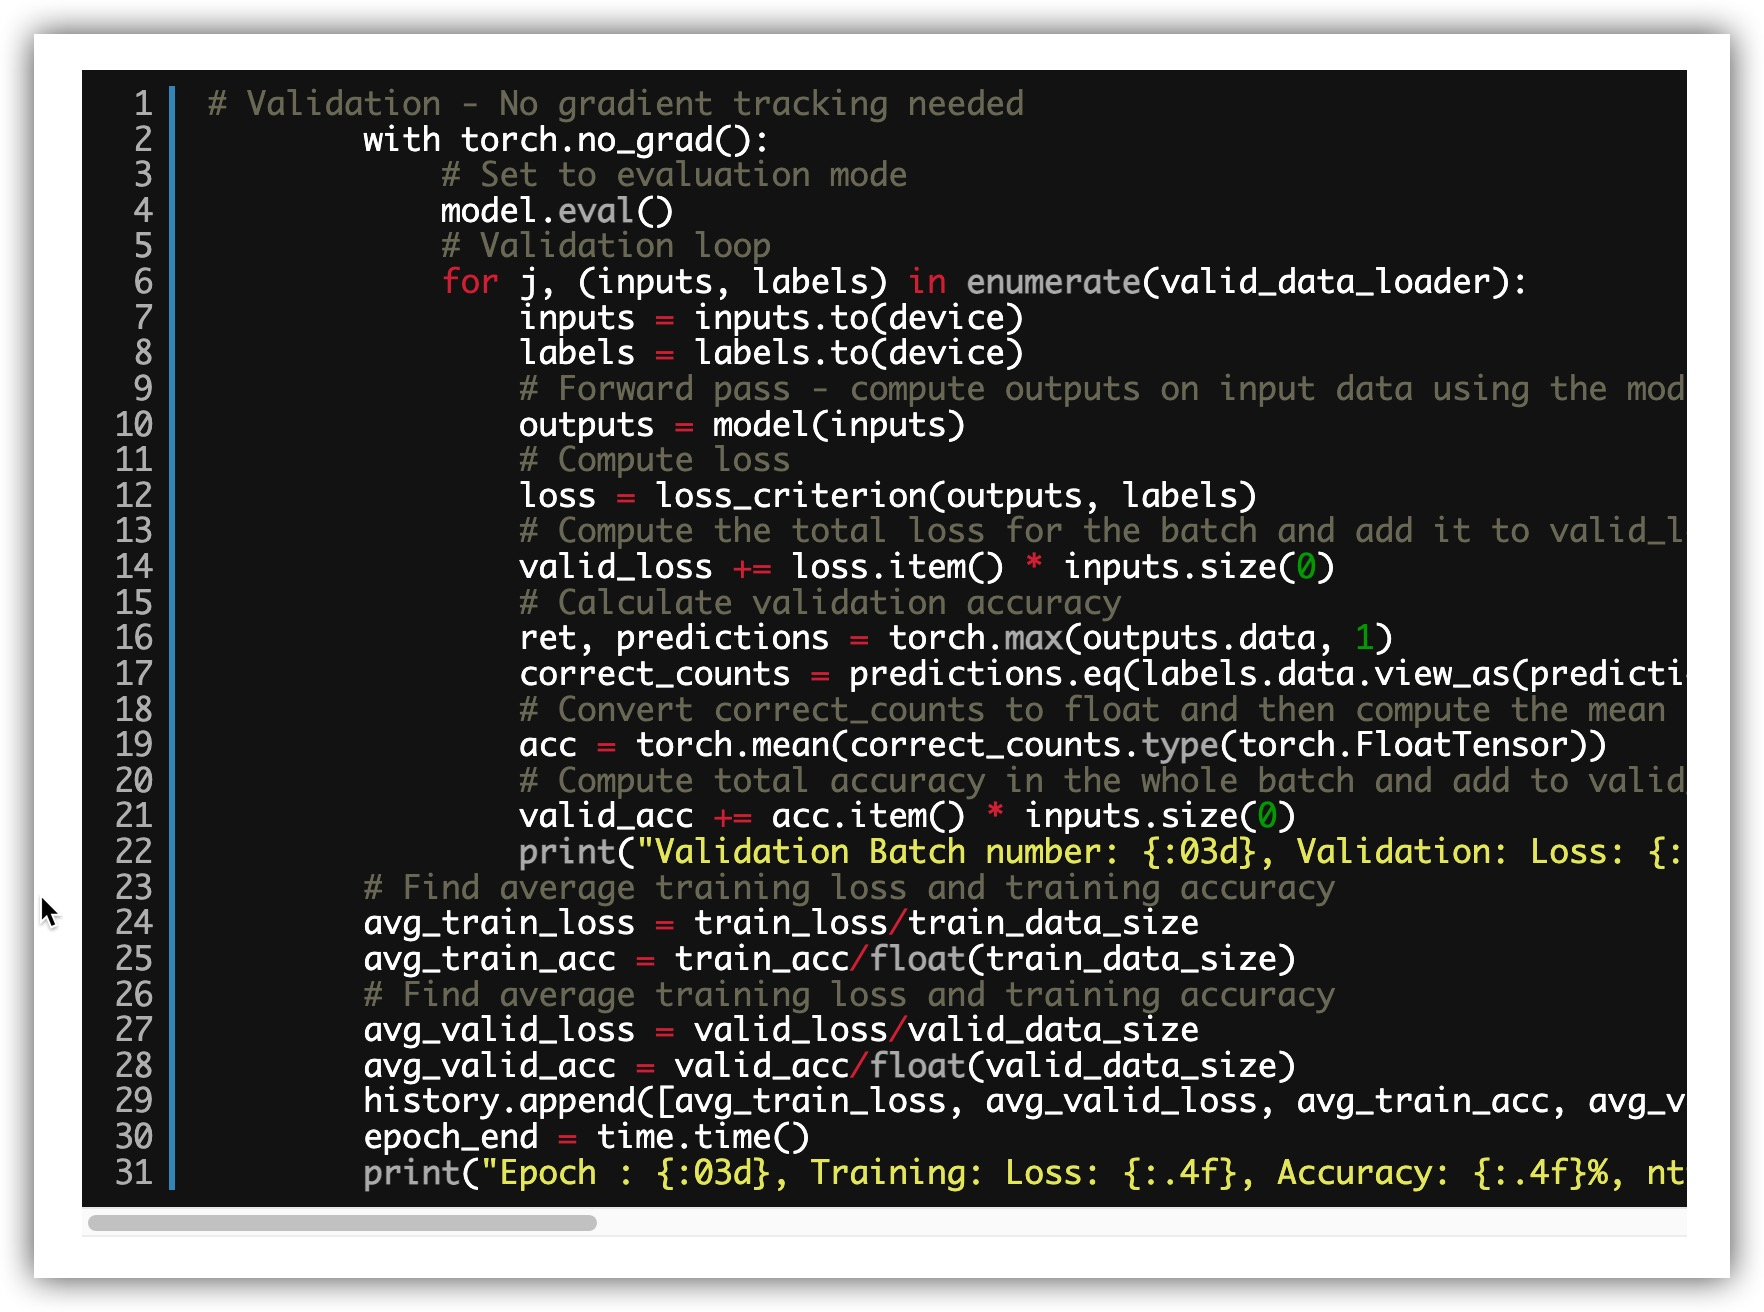

In [75]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_17-00-47.jpg')

In [76]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()

        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_data_loader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

             # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

             # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)


            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

            print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))
          
        # Validation - No gradient tracking needed
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

             # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                 # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                 # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                 # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
        
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

         # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))

        # Save if the model has best accuracy till now
        torch.save(model, dataset+'_model_'+str(epoch)+'.pt')

    return model, history


In [77]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 5
trained_model, history = train_and_validate(resnet50, loss_func, optimizer, num_epochs)

torch.save(history, dataset+'_history.pt')

Epoch: 1/5
Batch number: 000, Training: Loss: 1.3027, Accuracy: 0.4062
Batch number: 001, Training: Loss: 1.0548, Accuracy: 0.5625
Batch number: 002, Training: Loss: 0.8552, Accuracy: 0.5312
Batch number: 003, Training: Loss: 0.6391, Accuracy: 0.8438
Batch number: 004, Training: Loss: 0.8320, Accuracy: 0.5455
Validation Batch number: 000, Validation: Loss: 0.7643, Accuracy: 0.7188
Validation Batch number: 001, Validation: Loss: 0.5446, Accuracy: 0.8571
Epoch : 001, Training: Loss: 0.9438, Accuracy: 58.0000%, 
		Validation : Loss : 0.6618, Accuracy: 78.3333%, Time: 33.9509s
Epoch: 2/5
Batch number: 000, Training: Loss: 0.6340, Accuracy: 0.7188
Batch number: 001, Training: Loss: 0.5928, Accuracy: 0.7812
Batch number: 002, Training: Loss: 0.3820, Accuracy: 0.9375
Batch number: 003, Training: Loss: 0.3623, Accuracy: 0.8438
Batch number: 004, Training: Loss: 0.2632, Accuracy: 0.9545
Validation Batch number: 000, Validation: Loss: 0.3449, Accuracy: 0.9062
Validation Batch number: 001, Valida

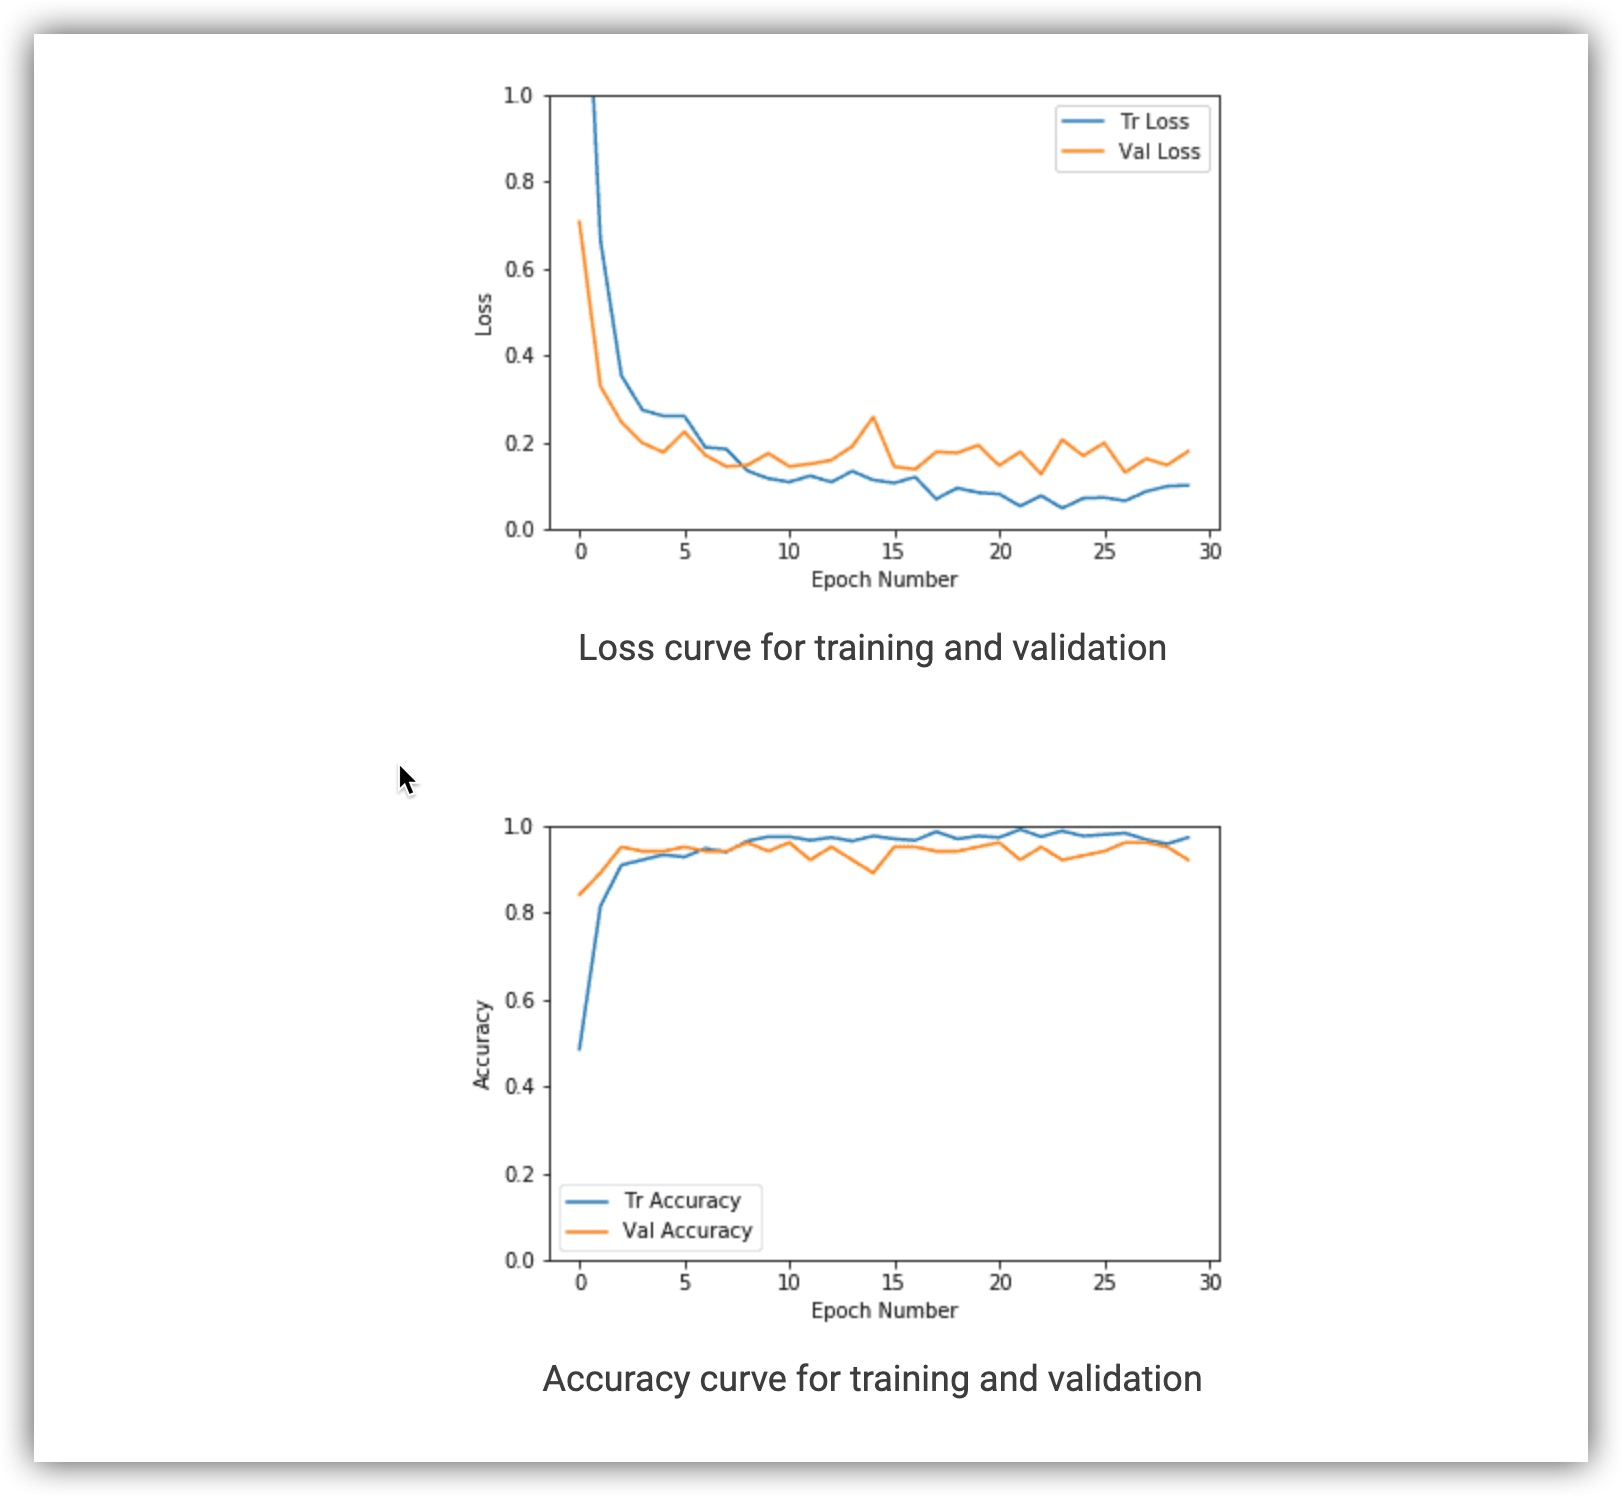

In [78]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_17-10-00.jpg')

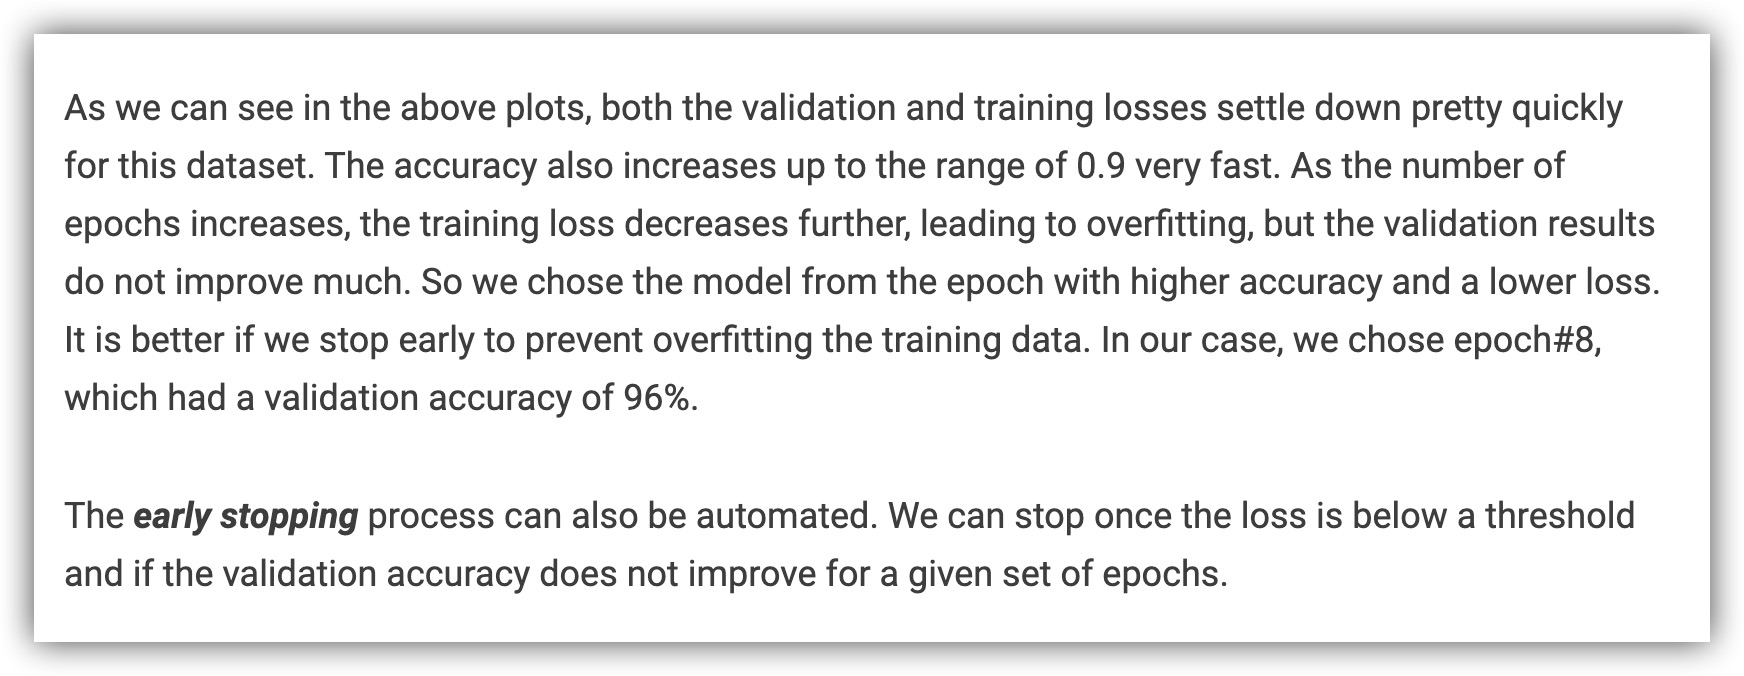

In [79]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_17-10-33.jpg')

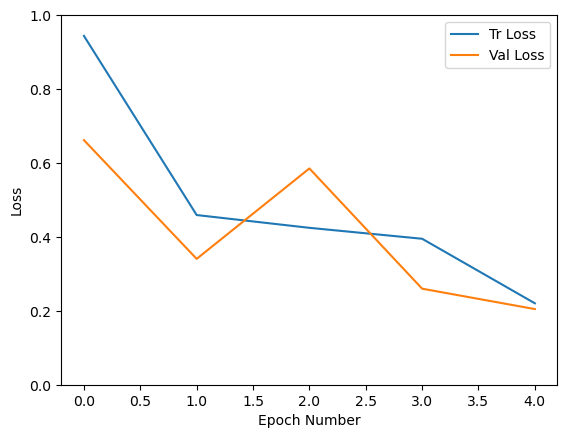

In [80]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig(dataset+'_loss_curve.png')
plt.show()

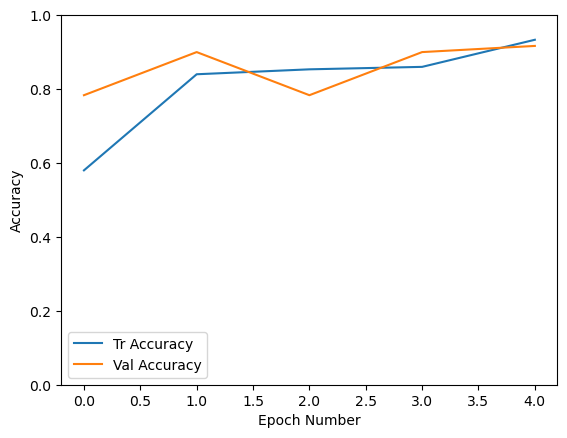

In [81]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

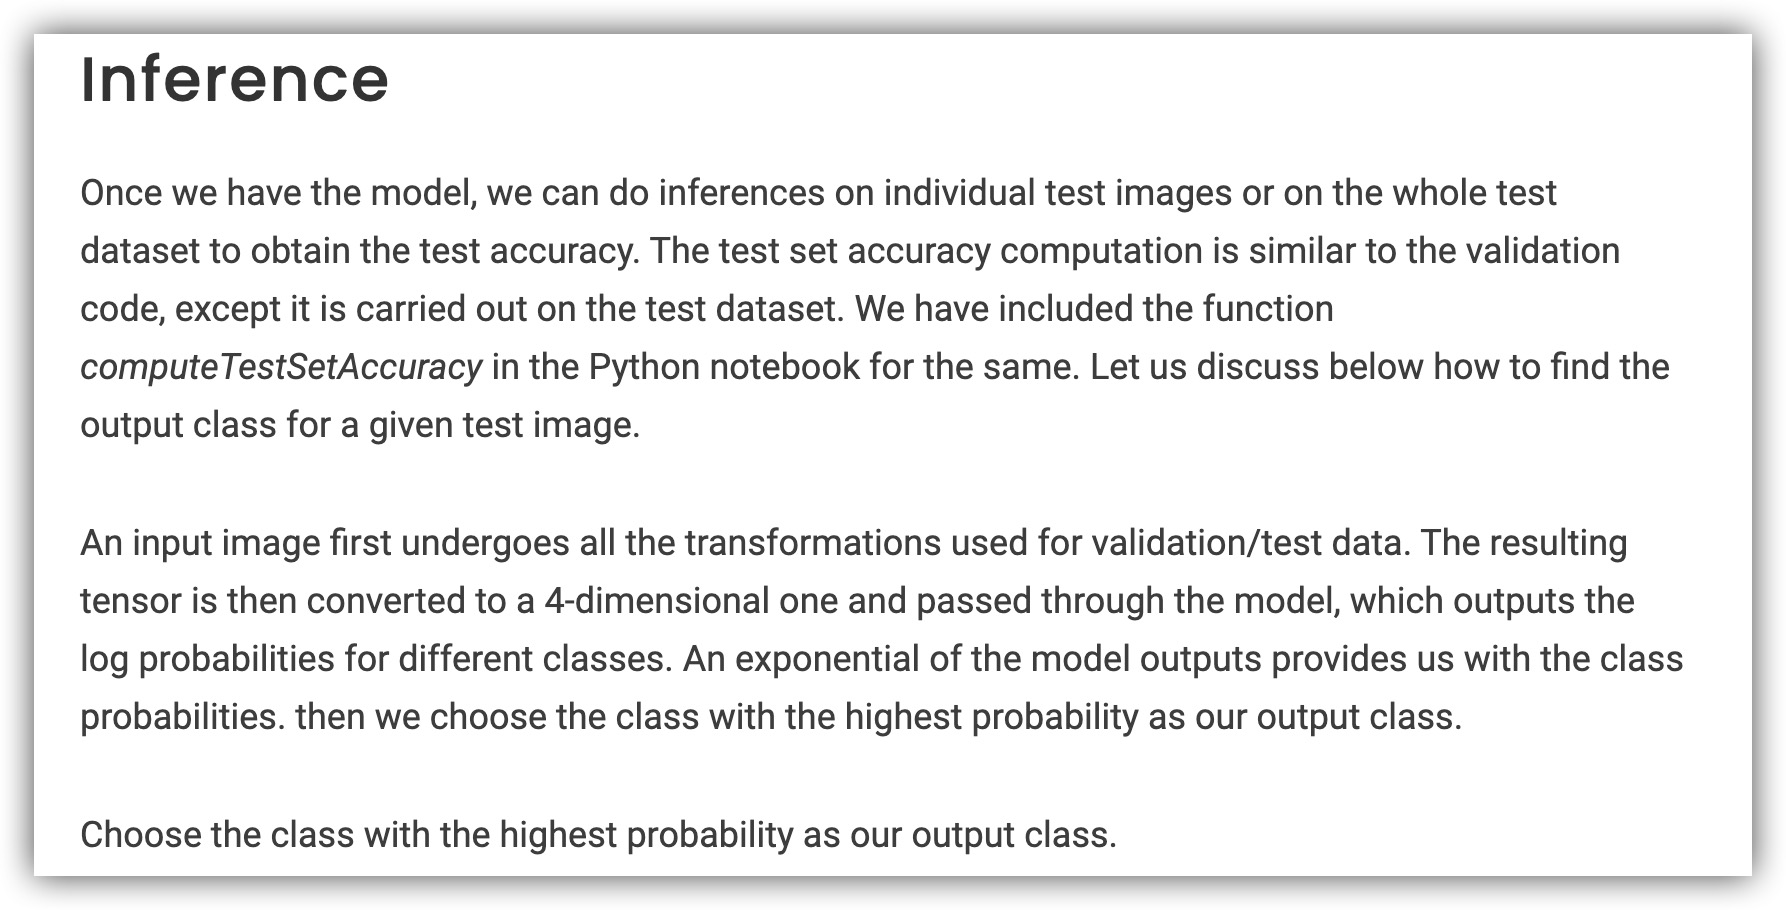

In [82]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_17-11-18.jpg')

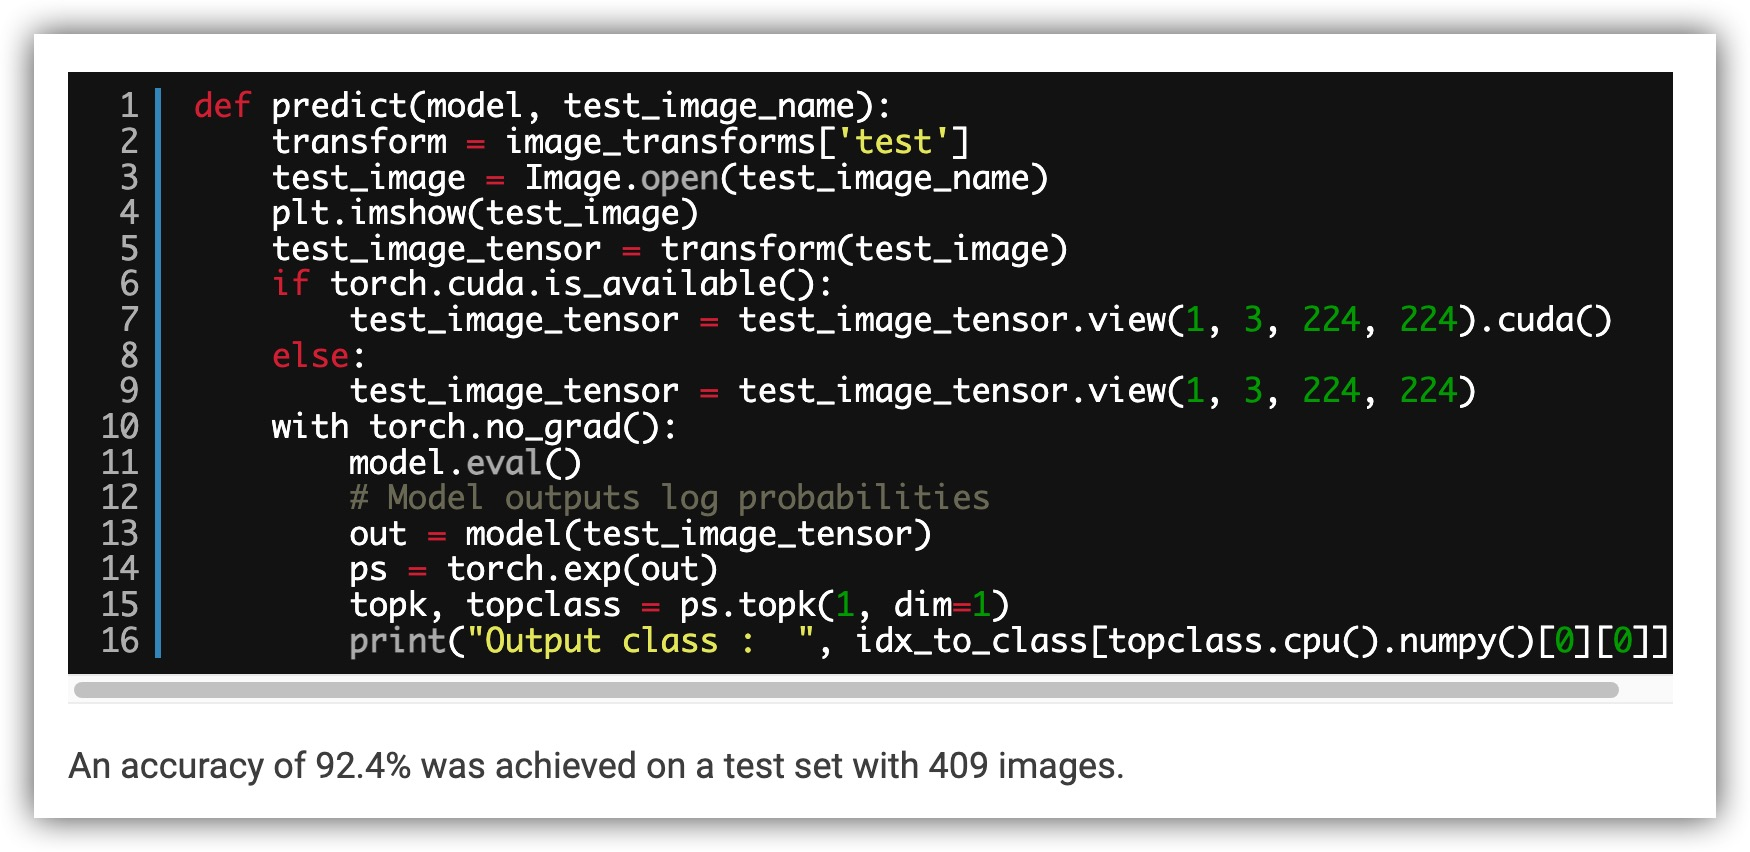

In [83]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/YouTube/Dennis Madsen/SB/Image/2023-04-12_17-11-50.jpg')

In [86]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']

    test_image = PImage.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(3, dim=1)
        for i in range(3):
            print("Predcition", i+1, ":", idx_to_class[topclass.numpy()[0][i]], ", Score: ", topk.numpy()[0][i])

Predcition 1 : bear , Score:  0.9956131
Predcition 2 : other , Score:  0.0031621289
Predcition 3 : gorilla , Score:  0.0012243834


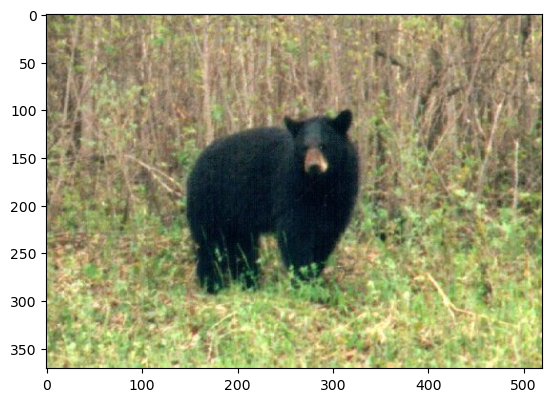

In [88]:
predict(trained_model, 'Datasets/caltec256subset/test/009_0098.jpg')

Predcition 1 : gorilla , Score:  0.987987
Predcition 2 : other , Score:  0.006694208
Predcition 3 : bear , Score:  0.0052756183


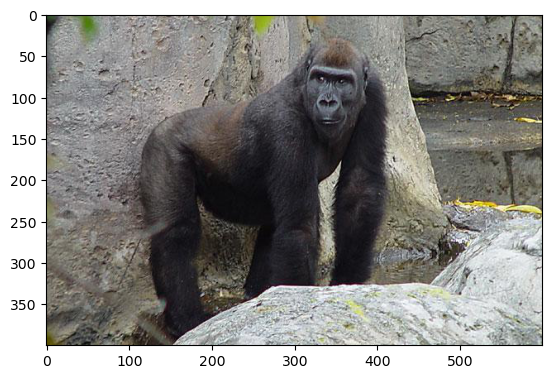

In [89]:
predict(trained_model, 'Datasets/caltec256subset/test/090_0107.jpg')

Predcition 1 : other , Score:  0.9974605
Predcition 2 : gorilla , Score:  0.0016940942
Predcition 3 : bear , Score:  0.00084524916


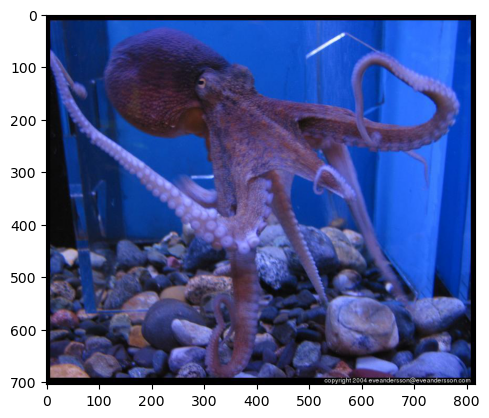

In [91]:
predict(trained_model, 'Datasets/caltec256subset/test/150_0044.jpg')